In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Amiksha/Downloads/ckd1.csv')

In [3]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
#changing the data columns
data.rename(columns={'bp': 'Dias_blood_pressure', 'sg': 'ur_specific_gravity','al':'ur_albumin','su':'ur_sugar','rbc':'red_blood_cells','pc':'ur_pus_cell','pcc':'ur_ pus_cell clumps','ba':'ur_bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      388 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [7]:
#Checking for missing values
data.isnull().sum()

id                           0
age                          9
Dias_blood_pressure         12
ur_specific_gravity         47
ur_albumin                  46
ur_sugar                    49
red_blood_cells            152
ur_pus_cell                 65
ur_ pus_cell clumps          0
ur_bacteria                  0
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 0
diabetes                     0
coronary artery disease      0
appetite                     0
pedal edema                  0
anemia                       0
class                        0
dtype: int64

In [8]:
#data cleaning
data.tail(10)

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes,coronary artery disease,appetite,pedal edema,anemia,class
390,390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,52,6300,5.3,no,no,no,good,no,no,notckd
391,391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44,5800,6.3,no,no,no,good,no,no,notckd
392,392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,46,6600,5.5,no,no,no,good,no,no,notckd
393,393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7400,5.4,no,no,no,good,no,no,notckd
394,394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,45,9500,4.6,no,no,no,good,no,no,notckd
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [9]:
data.describe()

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
data.describe(exclude=[np.number])

,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes,coronary artery disease,appetite,pedal edema,anemia,class
count,248,335,400,400,330,295,270,400,400,400,400,400,400,400
unique,2,2,2,2,44,92,46,2,4,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,358,378,21,11,18,253,260,364,318,324,340,248


In [11]:
#Starting with Categorical data first
data['red blood cell count'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [12]:
data['packed cell volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [13]:
data['white blood cell count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [16]:
data['red blood cell count'].loc[(data['red blood cell count']=='\t?')] = 'NaN'
data['packed cell volume'].loc[(data['packed cell volume']=='\t?')] = 'NaN'
data['white blood cell count'].loc[(data['white blood cell count']=='\t?')] = 'NaN'
data['packed cell volume'].loc[(data['packed cell volume']=='\t43')] = '43'
data['white blood cell count'].loc[(data['white blood cell count']=='\t6200')] = '6200'
data['white blood cell count'].loc[(data['white blood cell count']=='\t8400')] = '8400'

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\1954291244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red blood cell count'].loc[(data['red blood cell count']=='\t?')] = 'NaN'


In [17]:
data['packed cell volume'] = data['packed cell volume'].astype(float)
data['white blood cell count'] = data['white blood cell count'].astype(float)
data['red blood cell count'] = data['red blood cell count'].astype(float)

In [18]:
data.describe(exclude=[np.number])

,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,hypertension,diabetes,coronary artery disease,appetite,pedal edema,anemia,class
count,248,335,400,400,400,400,400,400,400,400,400
unique,2,2,2,2,2,4,3,2,2,2,3
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,358,378,253,260,364,318,324,340,248


In [19]:
#Diabetes
data['diabetes'].unique()

array(['yes', 'no', '\tno', '\tyes'], dtype=object)

In [20]:
data['diabetes'].loc[(data['diabetes']=='\tno')] = 'no'
data['diabetes'].loc[(data['diabetes']=='\tyes')] = 'yes'
data['diabetes'].loc[(data['diabetes']==' yes')] = 'yes'
data['diabetes'].unique()

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3736047621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diabetes'].loc[(data['diabetes']=='\tno')] = 'no'
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3736047621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diabetes'].loc[(data['diabetes']=='\tyes')] = 'yes'
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3736047621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

array(['yes', 'no'], dtype=object)

In [21]:
#coronary artery disease
data['coronary artery disease'].unique()

array(['no', 'yes', '\tno'], dtype=object)

In [22]:
data['coronary artery disease'].loc[(data['coronary artery disease']=='\tno')] = 'no'

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\1967904723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['coronary artery disease'].loc[(data['coronary artery disease']=='\tno')] = 'no'


In [23]:
#class
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [24]:
data['class'].loc[(data['class']=='ckd\t')] = 'ckd'

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3830704458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'].loc[(data['class']=='ckd\t')] = 'ckd'


In [25]:
data.describe(exclude=[np.number])

,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,hypertension,diabetes,coronary artery disease,appetite,pedal edema,anemia,class
count,248,335,400,400,400,400,400,400,400,400,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,358,378,253,263,366,318,324,340,250


In [26]:
data.describe()

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [27]:
#Blood pressure
bp_null = data['Dias_blood_pressure'].isnull()
data[['age','Dias_blood_pressure','hypertension','coronary artery disease']].loc[bp_null]

,age,Dias_blood_pressure,hypertension,coronary artery disease
7,24.0,NaN,no,no
75,5.0,NaN,no,no
132,50.0,NaN,yes,no
138,73.0,NaN,no,no
161,62.0,NaN,yes,no
164,14.0,NaN,no,no
185,4.0,NaN,no,no
187,3.0,NaN,no,no
188,8.0,NaN,no,no
215,2.0,NaN,no,no


In [28]:
#the average diastolic blood pressure for people with and without hypertension
data[['Dias_blood_pressure','hypertension']].groupby(['hypertension'], as_index = False).mean()

,hypertension,Dias_blood_pressure
0,no,73.580247
1,yes,81.310345


In [29]:
data[['Dias_blood_pressure','hypertension']].groupby(['hypertension'], as_index = False).median()

,hypertension,Dias_blood_pressure
0,no,70.0
1,yes,80.0


In [30]:
no_hypertension = (data['hypertension']== 'no')
yes_hypertension = (data['hypertension']== 'yes')
data.Dias_blood_pressure.loc[(bp_null & no_hypertension)] = data.Dias_blood_pressure.loc[(bp_null & no_hypertension)].fillna(data.Dias_blood_pressure.loc[no_hypertension].mean())
data.Dias_blood_pressure.loc[(bp_null & yes_hypertension)] = data.Dias_blood_pressure.loc[(bp_null & yes_hypertension)].fillna(data.Dias_blood_pressure.loc[yes_hypertension].mean())

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\2245170770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Dias_blood_pressure.loc[(bp_null & no_hypertension)] = data.Dias_blood_pressure.loc[(bp_null & no_hypertension)].fillna(data.Dias_blood_pressure.loc[no_hypertension].mean())
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\2245170770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Dias_blood_pressure.loc[(bp_null & yes_hypertension)] = data.Dias_blood_pressure.loc[(bp_null & yes_hypertension)].fillna(data.Dias_blood_pressure.loc[yes_hypertension].mean())


In [31]:
data['Dias_blood_pressure'].isnull().sum()

0

In [32]:
#Hypertension
htn_null = data['hypertension'].isnull()
data.loc[htn_null]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes,coronary artery disease,appetite,pedal edema,anemia,class


In [33]:
data['hypertension'] = data['hypertension'].fillna('no')
data['hypertension'].isnull().sum()

0

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [35]:
dm_null = data['diabetes'].isnull()
bgr_null = data['blood glucose random'].isnull()

In [36]:
data[['blood glucose random','diabetes']].groupby(['diabetes']).median()

,blood glucose random
diabetes,
no,109.0
yes,192.0


In [37]:
data[['blood glucose random','diabetes']].groupby(['diabetes']).mean()

,blood glucose random
diabetes,
no,117.311688
yes,204.816000


In [38]:
dm_null = data['diabetes'].isnull()
data[['blood glucose random','diabetes']].loc[dm_null]

,blood glucose random,diabetes


In [39]:
data.loc[dm_null]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes,coronary artery disease,appetite,pedal edema,anemia,class


In [40]:
data['diabetes'] = data['diabetes'].fillna('no')

In [41]:
#blood glucose random :

data[['ur_sugar','blood glucose random','diabetes']].loc[bgr_null].sort_values('diabetes')

,ur_sugar,blood glucose random,diabetes
1,0.0,NaN,no
332,0.0,NaN,no
123,3.0,NaN,no
131,0.0,NaN,no
139,0.0,NaN,no
141,0.0,NaN,no
186,0.0,NaN,no
187,0.0,NaN,no
209,0.0,NaN,no
215,0.0,NaN,no


In [42]:
data[['blood glucose random','diabetes']].loc[bgr_null].groupby(['diabetes']).size()

diabetes
no     32
yes    12
dtype: int64

In [43]:
# since the diabetes column is clean we can encode it to study the correlation with the blood glucose random variable
dummy_diabetes = pd.get_dummies(data['diabetes'] , drop_first = True)
data.drop(['diabetes'] , axis = 1 , inplace = True)
data = data.join(dummy_diabetes)
data.rename(columns={'yes': 'diabetes'}, inplace = True)
data

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,coronary artery disease,appetite,pedal edema,anemia,class,diabetes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,no,good,no,no,ckd,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,good,no,no,ckd,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,no,poor,no,yes,ckd,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,poor,yes,yes,ckd,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,good,no,no,ckd,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,good,no,no,notckd,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,good,no,no,notckd,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,good,no,no,notckd,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,good,no,no,notckd,0


In [44]:
data['blood glucose random'].corr(data['diabetes'])

0.5275677530947318

In [45]:
data['blood glucose random'].loc[(bgr_null & (data.diabetes == 0))] = data['blood glucose random'].loc[(bgr_null & (data.diabetes == 0))].fillna(116)
data['blood glucose random'].loc[(bgr_null & (data.diabetes == 1))] = data['blood glucose random'].loc[(bgr_null & (data.diabetes == 1))].fillna(103)
data['blood glucose random'].isnull().sum()

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3247907399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['blood glucose random'].loc[(bgr_null & (data.diabetes == 0))] = data['blood glucose random'].loc[(bgr_null & (data.diabetes == 0))].fillna(116)
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3247907399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['blood glucose random'].loc[(bgr_null & (data.diabetes == 1))] = data['blood glucose random'].loc[(bgr_null & (data.diabetes == 1))].fillna(103)


0

In [46]:
#ur_sugar :

data['ur_sugar'].isnull().sum()

49

In [47]:
data[['ur_sugar','blood glucose random','diabetes']].loc[(data['ur_sugar'].isnull())]

,ur_sugar,blood glucose random,diabetes
13,NaN,98.0,1
17,NaN,114.0,0
21,NaN,103.0,1
30,NaN,93.0,1
37,NaN,137.0,1
50,NaN,91.0,1
57,NaN,93.0,1
59,NaN,103.0,1
78,NaN,158.0,0
81,NaN,360.0,1


In [48]:
data[['ur_sugar','blood glucose random','diabetes']].loc[(data['blood glucose random']>250)].sort_values(['blood glucose random','ur_sugar'])

,ur_sugar,blood glucose random,diabetes
88,0.0,251.0,1
198,2.0,252.0,1
58,0.0,253.0,1
212,4.0,253.0,1
210,2.0,255.0,1
140,4.0,256.0,0
175,0.0,261.0,0
18,3.0,263.0,1
27,4.0,264.0,1
137,0.0,268.0,1


In [49]:
data['ur_sugar'].describe()

count    351.000000
mean       0.450142
std        1.099191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: ur_sugar, dtype: float64

In [50]:
data['ur_sugar'] = data['ur_sugar'].fillna(0)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 400 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [52]:
#checking the missing value in the pedal edema column:

data.loc[(data['pedal edema'].isnull())]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,coronary artery disease,appetite,pedal edema,anemia,class,diabetes


In [53]:
data.loc[(data['pedal edema'].isnull())].isnull().sum()

id                         0.0
age                        0.0
Dias_blood_pressure        0.0
ur_specific_gravity        0.0
ur_albumin                 0.0
ur_sugar                   0.0
red_blood_cells            0.0
ur_pus_cell                0.0
ur_ pus_cell clumps        0.0
ur_bacteria                0.0
blood glucose random       0.0
blood urea                 0.0
serum creatinine           0.0
sodium                     0.0
potassium                  0.0
hemoglobin                 0.0
packed cell volume         0.0
white blood cell count     0.0
red blood cell count       0.0
hypertension               0.0
coronary artery disease    0.0
appetite                   0.0
pedal edema                0.0
anemia                     0.0
class                      0.0
diabetes                   0.0
dtype: float64

In [54]:
data['appetite'].unique()

array(['good', 'poor'], dtype=object)

In [55]:
data['pedal edema'].unique()

array(['no', 'yes'], dtype=object)

In [56]:
data['anemia'].unique()

array(['no', 'yes'], dtype=object)

In [57]:
data['appetite'] = data['appetite'].fillna('good')
data['pedal edema'] = data['pedal edema'].fillna('no')
data['anemia'] = data['anemia'].fillna('no')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 400 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [59]:
#checking the missing values in the coronary artery disease column:

data.loc[(data['coronary artery disease'].isnull())]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,coronary artery disease,appetite,pedal edema,anemia,class,diabetes


In [60]:
data['coronary artery disease'].unique()

array(['no', 'yes'], dtype=object)

In [61]:
data['coronary artery disease'] = data['coronary artery disease'].fillna('no')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 400 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [63]:
#I'm going to encode the categorical columns that are clean .

dummy_anemia = pd.get_dummies(data['anemia'] , drop_first = True)
data.drop(['anemia'] , axis = 1 , inplace = True)
data = data.join(dummy_anemia)
data.rename(columns={'yes': 'anemia'}, inplace = True)
data

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,coronary artery disease,appetite,pedal edema,class,diabetes,anemia
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,no,good,no,ckd,1,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,good,no,ckd,0,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,no,poor,no,ckd,1,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,poor,yes,ckd,0,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,good,no,ckd,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,good,no,notckd,0,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,good,no,notckd,0,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,good,no,notckd,0,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,good,no,notckd,0,0


In [64]:
dummy_class = pd.get_dummies(data['class'])
data.drop(['class'] , axis = 1 , inplace = True)
data = data.join(dummy_class)
data.drop(['notckd'],axis=1,inplace = True)
data

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,coronary artery disease,appetite,pedal edema,diabetes,anemia,ckd
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,no,good,no,1,0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,good,no,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,no,poor,no,1,1,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,poor,yes,0,1,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,good,no,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,good,no,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,good,no,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,good,no,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,good,no,0,0,0


In [65]:
dummy_edema = pd.get_dummies(data['pedal edema'] , drop_first = True)
data.drop(['pedal edema'] , axis = 1 , inplace = True)
data = data.join(dummy_edema)
data.rename(columns={'yes': 'pedal edema'}, inplace = True)
data['pedal edema']

0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: pedal edema, Length: 400, dtype: uint8

In [66]:
dummy_appetite = pd.get_dummies(data['appetite'] , drop_first = True)
data.drop(['appetite'] , axis = 1 , inplace = True)
data.rename(columns={'poor': 'poor_appetite'}, inplace = True)
data = data.join(dummy_appetite)
data

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,coronary artery disease,diabetes,anemia,ckd,pedal edema,poor
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,no,1,0,1,0,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,0,0,1,0,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,no,1,1,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,0,0,0,0,0


In [67]:
dummy_hypertension = pd.get_dummies(data['hypertension'] , drop_first = True)
data.drop(['hypertension'] , axis = 1 , inplace = True)
data = data.join(dummy_hypertension)
data.rename(columns={'yes': 'hypertension'}, inplace = True)
data

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,coronary artery disease,diabetes,anemia,ckd,pedal edema,poor,hypertension
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,no,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,0,0,1,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,1,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,no,0,1,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,0,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,0,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,0,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,0,0,0,0,0,0


In [68]:
dummy_coronary = pd.get_dummies(data['coronary artery disease'] , drop_first = True)
data.drop(['coronary artery disease'] , axis = 1 , inplace = True)
data = data.join(dummy_coronary)
data.rename(columns={'yes': 'coronary artery disease'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 400 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [69]:
data.iloc[:,-7:].describe()

,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.34250,0.150000,0.625000,0.190000,0.205000,0.367500,0.085000
std,0.47514,0.357519,0.484729,0.392792,0.404207,0.482728,0.279231
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
data['red_blood_cells'].value_counts()

normal      201
abnormal     47
Name: red_blood_cells, dtype: int64

In [71]:
data['red_blood_cells'].isnull().sum()

152

In [72]:
data[['age','red_blood_cells','red blood cell count','hemoglobin','anemia']].loc[(data['red_blood_cells'].isnull())&(data['red blood cell count'].notnull())]

,age,red_blood_cells,red blood cell count,hemoglobin,anemia
0,48.0,NaN,5.2,15.4,0
5,60.0,NaN,4.4,12.2,0
12,68.0,NaN,3.4,9.7,0
15,40.0,NaN,2.8,7.6,1
18,60.0,NaN,4.3,12.7,0
...,...,...,...,...,...
309,51.0,NaN,5.9,17.2,0
322,70.0,NaN,4.9,16.0,0
349,35.0,NaN,6.1,14.5,0
350,65.0,NaN,4.5,16.1,0


In [73]:
#the description of ages and red blood cell count for patients with normal red blood cells 
data[['age','red_blood_cells','red blood cell count']].loc[(data['red_blood_cells'] == 'normal')&(data['red blood cell count'].notnull())].describe()

,age,red blood cell count
count,173.000000,174.000000
mean,49.115607,5.004023
std,15.990129,0.963097
min,12.000000,2.100000
25%,37.000000,4.500000
50%,50.000000,5.100000
75%,60.000000,5.700000
max,83.000000,8.000000


In [74]:
#the description of ages and red blood cell count for patients with abnormal red blood cells 
data[['age','red_blood_cells','red blood cell count']].loc[(data['red_blood_cells'] == 'abnormal')&(data['red blood cell count'].notnull())].describe()

,age,red blood cell count
count,25.000000,25.00000
mean,54.040000,3.83200
std,14.313397,0.81072
min,6.000000,2.50000
25%,49.000000,3.20000
50%,57.000000,3.70000
75%,62.000000,4.30000
max,73.000000,5.60000


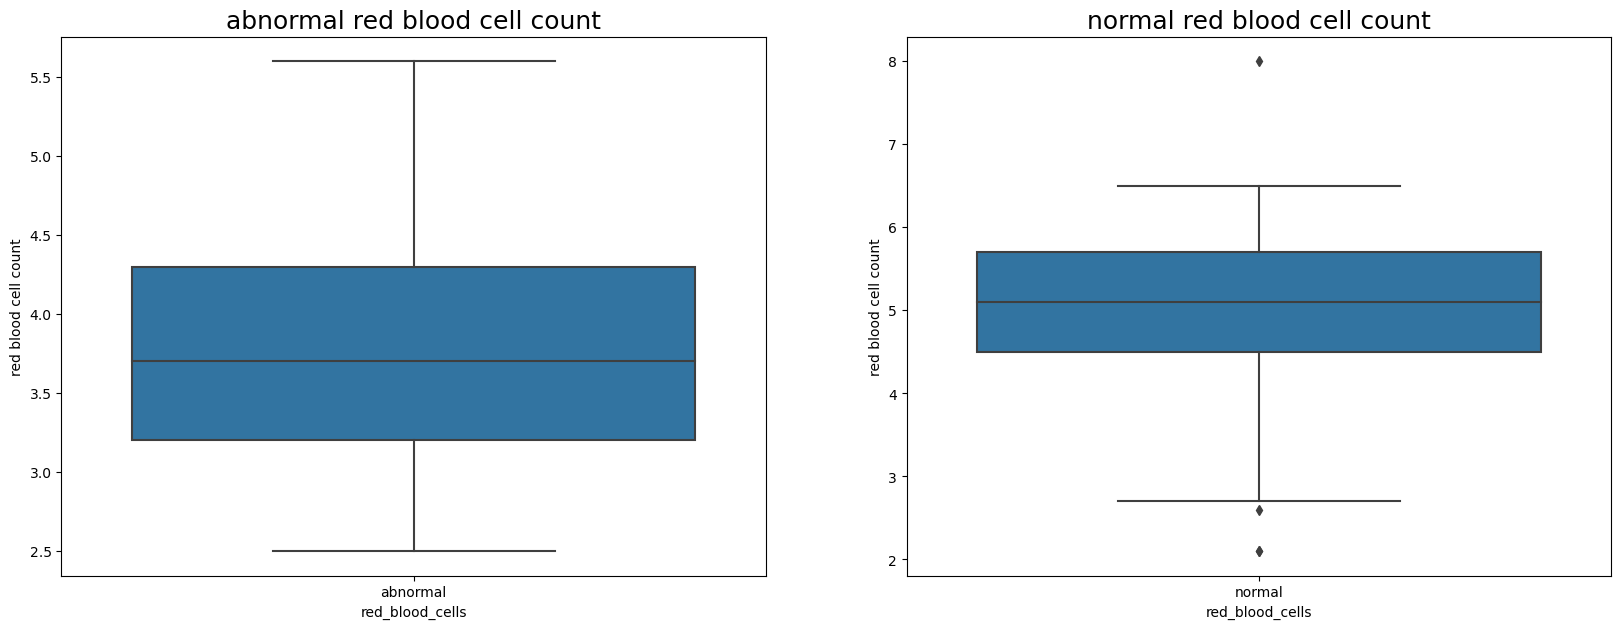

In [75]:
import matplotlib.pyplot as plt 
import seaborn as sns 
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(
    x='red_blood_cells',
    y='red blood cell count',
    data=data[['red_blood_cells','red blood cell count']].loc[(data['red_blood_cells'] == 'abnormal')&(data['red blood cell count'].notnull())],
    ax=axes[0])
sns.boxplot(
    x='red_blood_cells',
    y='red blood cell count',
    data=data[['red_blood_cells','red blood cell count']].loc[(data['red_blood_cells'] == 'normal')&(data['red blood cell count'].notnull())],
    ax =axes[1])
axes[0].set_title('abnormal red blood cell count', fontsize=18); 
axes[1].set_title('normal red blood cell count', fontsize=18)
plt.show()

In [76]:
data['red_blood_cells'].loc[(data['red_blood_cells'].isnull())&(data['red blood cell count'] < 4.5)] =data['red_blood_cells'].loc[
    (data['red_blood_cells'].isnull())&(data['red blood cell count'] < 4.5)].fillna('abnormal')
data['red_blood_cells'].loc[(data['red_blood_cells'].isnull())&(data['red blood cell count'] >= 4.5)] =data['red_blood_cells'].loc[
    (data['red_blood_cells'].isnull())&(data['red blood cell count'] >= 4.5)].fillna('normal')

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\2253935437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_blood_cells'].loc[(data['red_blood_cells'].isnull())&(data['red blood cell count'] < 4.5)] =data['red_blood_cells'].loc[
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\2253935437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_blood_cells'].loc[(data['red_blood_cells'].isnull())&(data['red blood cell count'] >= 4.5)] =data['red_blood_cells'].loc[


In [77]:
data.loc[(data['red_blood_cells'].isnull())&(data['age'] < 16)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
1,1,7.0,50.000000,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,0,0,1,0,0,0,0
47,47,11.0,80.000000,1.010,3.0,0.0,NaN,normal,notpresent,notpresent,...,45.0,8600.0,NaN,0,0,1,0,0,0,0
75,75,5.0,73.580247,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,0,1,1,0,0,0,0
131,131,5.0,50.000000,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36.0,12400.0,NaN,0,0,1,0,0,0,0
185,185,4.0,73.580247,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,34.0,NaN,NaN,0,0,1,0,0,0,0
188,188,8.0,73.580247,NaN,NaN,0.0,NaN,NaN,notpresent,notpresent,...,38.0,NaN,NaN,0,0,1,0,0,0,0


In [78]:
data[['age','red_blood_cells','red blood cell count']].loc[(data['red_blood_cells'].isnull())&(data['age'] < 16)].describe()

,age,red blood cell count
count,6.000000,0.0
mean,6.666667,NaN
std,2.581989,NaN
min,4.000000,NaN
25%,5.000000,NaN
50%,6.000000,NaN
75%,7.750000,NaN
max,11.000000,NaN


In [79]:
data.loc[(data['red_blood_cells'] == 'abnormal')&(data['age'] < 16)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
62,62,15.0,60.0,1.020,3.0,0.0,abnormal,normal,notpresent,notpresent,...,33.0,7700.0,3.8,1,0,1,0,0,1,0
114,114,12.0,60.0,1.015,3.0,0.0,abnormal,abnormal,present,notpresent,...,NaN,10300.0,NaN,0,0,1,0,0,0,0
190,190,6.0,60.0,1.010,4.0,0.0,abnormal,abnormal,notpresent,present,...,30.0,16700.0,4.8,0,0,1,0,1,0,0


In [80]:
data.loc[(data['age'] < 16)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
1,1,7.0,50.000000,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,0,0,1,0,0,0,0
47,47,11.0,80.000000,1.010,3.0,0.0,NaN,normal,notpresent,notpresent,...,45.0,8600.0,NaN,0,0,1,0,0,0,0
62,62,15.0,60.000000,1.020,3.0,0.0,abnormal,normal,notpresent,notpresent,...,33.0,7700.0,3.8,1,0,1,0,0,1,0
75,75,5.0,73.580247,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,0,1,1,0,0,0,0
114,114,12.0,60.000000,1.015,3.0,0.0,abnormal,abnormal,present,notpresent,...,NaN,10300.0,NaN,0,0,1,0,0,0,0
131,131,5.0,50.000000,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36.0,12400.0,NaN,0,0,1,0,0,0,0
150,150,8.0,60.000000,1.025,3.0,0.0,normal,normal,notpresent,notpresent,...,41.0,6700.0,NaN,0,0,1,1,1,0,0
164,164,14.0,73.580247,1.015,0.0,0.0,normal,NaN,notpresent,notpresent,...,40.0,9500.0,5.4,1,0,1,1,1,0,0
185,185,4.0,73.580247,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,34.0,NaN,NaN,0,0,1,0,0,0,0
186,186,8.0,50.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,0,0,1,1,0,0,0


In [81]:
data['red_blood_cells'].loc[(data['age'] < 16)].value_counts()

normal      7
abnormal    3
Name: red_blood_cells, dtype: int64

In [82]:
data['red_blood_cells'].loc[(data['age'] < 16)] = data['red_blood_cells'].loc[(data['age'] < 16)].fillna('normal')

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\2255998212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_blood_cells'].loc[(data['age'] < 16)] = data['red_blood_cells'].loc[(data['age'] < 16)].fillna('normal')


In [83]:
data['red_blood_cells'].value_counts()

normal      236
abnormal     88
Name: red_blood_cells, dtype: int64

In [84]:
data['red_blood_cells'].isnull().sum()

76

In [85]:
data.loc[(data['red_blood_cells'].isnull())]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36.0,NaN,NaN,0,0,1,0,0,0,0
10,10,50.0,60.0,1.010,2.0,4.0,NaN,abnormal,present,notpresent,...,28.0,NaN,NaN,1,1,1,0,0,1,0
13,13,68.0,70.0,NaN,NaN,0.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,1,0,1,1,1,1,1
16,16,47.0,70.0,1.015,2.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,0,0,1,0,0,0,0
17,17,47.0,80.0,NaN,NaN,0.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,60.0,90.0,NaN,NaN,0.0,NaN,NaN,notpresent,notpresent,...,35.0,NaN,NaN,1,0,1,1,0,1,1
235,235,45.0,70.0,1.010,2.0,0.0,NaN,normal,notpresent,notpresent,...,26.0,5700.0,NaN,0,1,1,0,0,0,1
236,236,65.0,80.0,NaN,NaN,0.0,NaN,NaN,notpresent,notpresent,...,25.0,NaN,NaN,1,0,1,1,0,1,1
237,237,80.0,70.0,1.015,2.0,2.0,NaN,normal,notpresent,notpresent,...,40.0,9600.0,NaN,1,0,1,1,1,1,0


In [86]:
data.loc[(data['red_blood_cells'].isnull())].describe(include ='all')

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
count,76.000000,73.000000,76.000000,47.000000,48.000000,76.000000,0,45,76,76,...,32.000000,11.000000,0.0,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,68,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,131.394737,56.506849,77.678687,1.013936,1.041667,0.460526,NaN,NaN,NaN,NaN,...,34.593750,8081.818182,NaN,0.500000,0.210526,1.0,0.276316,0.289474,0.473684,0.105263
std,67.327870,15.097023,12.399832,0.004415,1.147770,1.088617,NaN,NaN,NaN,NaN,...,7.762022,2653.608178,NaN,0.503322,0.410391,0.0,0.450146,0.456532,0.502625,0.308931
min,6.000000,17.000000,60.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,17.000000,5700.000000,NaN,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,81.000000,47.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,29.500000,6600.000000,NaN,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,132.000000,60.000000,70.000000,1.015000,1.000000,0.000000,NaN,NaN,NaN,NaN,...,35.500000,7000.000000,NaN,0.500000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,192.500000,68.000000,90.000000,1.015000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,39.000000,9200.000000,NaN,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000


In [87]:
data[['red_blood_cells','red blood cell count']].loc[(data['red_blood_cells'].isnull())].isnull().sum()

red_blood_cells         76
red blood cell count    76
dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 400 non-null    float64
 6   red_blood_cells          324 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [89]:
#hemoglobin :

data[['age','red_blood_cells','red blood cell count','hemoglobin','anemia']].loc[(data['hemoglobin'].isnull())]

,age,red_blood_cells,red blood cell count,hemoglobin,anemia
23,21.0,NaN,NaN,NaN,1
28,75.0,NaN,NaN,NaN,0
30,NaN,NaN,NaN,NaN,0
34,70.0,normal,NaN,NaN,0
41,45.0,NaN,NaN,NaN,0
57,76.0,NaN,NaN,NaN,0
60,67.0,NaN,NaN,NaN,0
61,67.0,normal,NaN,NaN,0
66,67.0,abnormal,NaN,NaN,0
67,45.0,normal,NaN,NaN,0


In [90]:
#the influence of red blood cell  on anemia , hemoglobin and red blood cell count .
data[['age','red_blood_cells','red blood cell count','hemoglobin']].groupby('red_blood_cells').describe()

age                                                      \
                 count       mean        std  min    25%   50%   75%   max   
red_blood_cells                                                              
abnormal          84.0  55.904762  14.895313  6.0  48.75  59.5  65.0  90.0   
normal           234.0  48.329060  17.861372  2.0  36.25  50.0  62.0  83.0   

                red blood cell count            ...           hemoglobin  \
                               count      mean  ...  75%  max      count   
red_blood_cells                                 ...                        
abnormal                        66.0  3.734848  ...  4.1  5.6       81.0   
normal                         203.0  5.023645  ...  5.7  8.0      219.0   

                                                                    
                      mean       std  min   25%   50%    75%   max  
red_blood_cells                                                     
abnormal         10.267901  2.089308  4.8   9.1  10.4  11.60  16.1  
normal           13.743836  2.620963  3.1  12.3  14.2  15.55  17.8  

[2 rows x 24 columns]

In [91]:
#the influence of anemia on red blood cell count and hemoglobin 
data[['age','red blood cell count','hemoglobin','anemia']].groupby('anemia').describe()

age                                                      \
        count       mean        std  min    25%   50%   75%   max   
anemia                                                              
0       334.0  51.116766  17.583131  2.0  40.25  55.0  65.0  90.0   
1        57.0  53.631579  14.461317  5.0  48.00  54.0  62.0  83.0   

       red blood cell count            ...           hemoglobin             \
                      count      mean  ...  75%  max      count       mean   
anemia                                 ...                                   
0                     233.0  4.912017  ...  5.5  8.0      293.0  13.261433   
1                      36.0  3.383333  ...  3.9  4.9       55.0   8.610909   

                                               
             std  min   25%   50%   75%   max  
anemia                                         
0       2.450394  5.6  11.3  13.5  15.1  17.8  
1       1.870103  3.1   7.8   8.6   9.7  12.4  

[2 rows x 24 columns]

In [92]:
#the correlation between ('age','red_blood_cells','red blood cell count','hemoglobin','anemia')
hematology = data[['age','red_blood_cells','red blood cell count','hemoglobin','anemia']].corr()
hematology

,age,red blood cell count,hemoglobin,anemia
age,1.000000,-0.268896,-0.192928,0.051753
red blood cell count,-0.268896,1.000000,0.798880,-0.508560
hemoglobin,-0.192928,0.798880,1.000000,-0.583289
anemia,0.051753,-0.508560,-0.583289,1.000000


<AxesSubplot:>

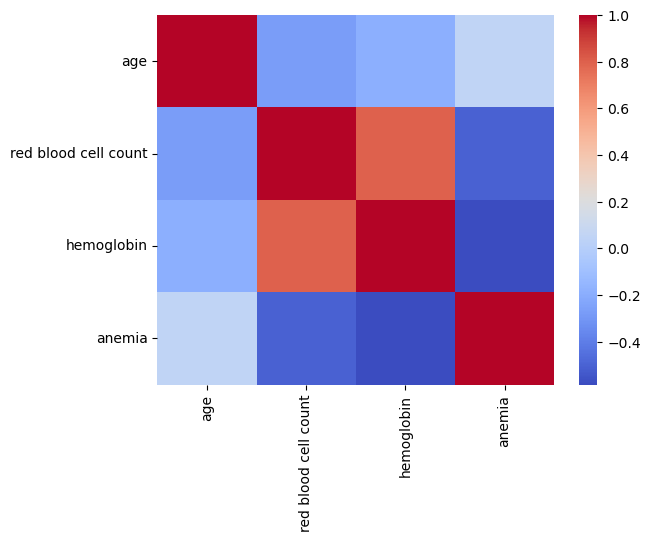

In [93]:
sns.heatmap(hematology,cmap="coolwarm")

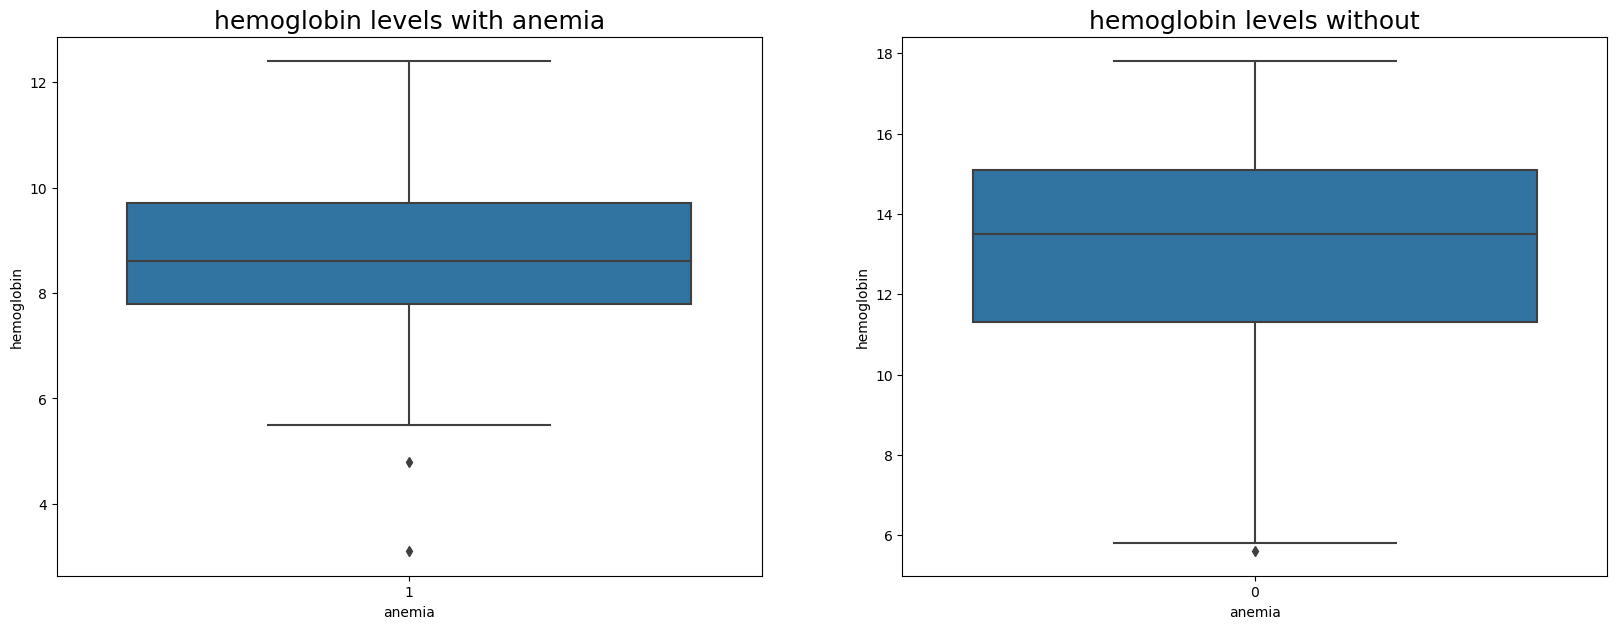

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(
    x='anemia',
    y='hemoglobin',
    data=data[['anemia','hemoglobin']].loc[(data['anemia'] == 1)&(data['hemoglobin'].notnull())],
    ax=axes[0])
sns.boxplot(
    x='anemia',
    y='hemoglobin',
    data=data[['anemia','hemoglobin']].loc[(data['anemia'] == 0)&(data['hemoglobin'].notnull())],
    ax =axes[1])
axes[0].set_title('hemoglobin levels with anemia', fontsize=18); 
axes[1].set_title('hemoglobin levels without', fontsize=18)
plt.show()

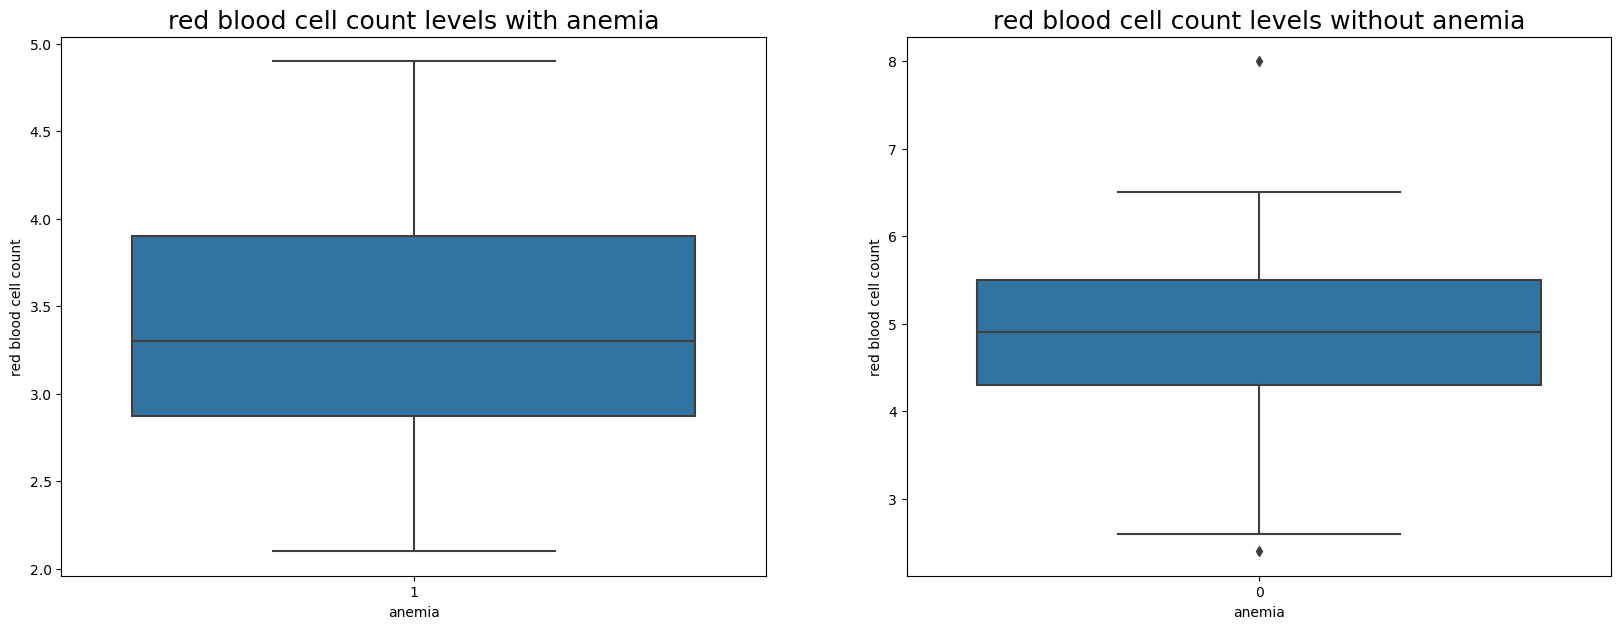

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(
    x='anemia',
    y='red blood cell count',
    data=data[['anemia','red blood cell count']].loc[(data['anemia'] == 1)&(data['red blood cell count'].notnull())],
    ax=axes[0])
sns.boxplot(
    x='anemia',
    y='red blood cell count',
    data=data[['anemia','red blood cell count']].loc[(data['anemia'] == 0)&(data['red blood cell count'].notnull())],
    ax =axes[1])
axes[0].set_title('red blood cell count levels with anemia', fontsize=18); 
axes[1].set_title('red blood cell count levels without anemia', fontsize=18)
plt.show()

In [96]:
# hemoglobin level and red blood cell count variation with anemia
data[['anemia','hemoglobin','red blood cell count']].loc[(data['anemia'] == 1)&(data['hemoglobin'].notnull())].describe()

,anemia,hemoglobin,red blood cell count
count,55.0,55.000000,36.000000
mean,1.0,8.610909,3.383333
std,0.0,1.870103,0.741234
min,1.0,3.100000,2.100000
25%,1.0,7.800000,2.875000
50%,1.0,8.600000,3.300000
75%,1.0,9.700000,3.900000
max,1.0,12.400000,4.900000


In [97]:
#hemoglobin level and red blood cell count without anemia
data[['anemia','hemoglobin','red blood cell count']].loc[(data['anemia'] == 0)&(data['hemoglobin'].notnull())].describe()

,anemia,hemoglobin,red blood cell count
count,293.0,293.000000,229.000000
mean,0.0,13.261433,4.906550
std,0.0,2.450394,0.895555
min,0.0,5.600000,2.400000
25%,0.0,11.300000,4.300000
50%,0.0,13.500000,4.900000
75%,0.0,15.100000,5.500000
max,0.0,17.800000,8.000000


In [98]:
#replacing the missing values in the red blood cell count with the mean red blood cell count of their groupe (anemic or not)
rbcc_null = (data['red blood cell count'].isnull())
yes_anemia = (data['anemia'] == 1)
no_anemia = (data['anemia'] == 0)
mean_rbcc_anemia = data['red blood cell count'].loc[yes_anemia].mean()
mean_rbcc_noanemia = data['red blood cell count'].loc[no_anemia].mean()
data['red blood cell count'].loc[yes_anemia] = data['red blood cell count'].loc[yes_anemia].fillna(mean_rbcc_anemia)
data['red blood cell count'].loc[no_anemia] = data['red blood cell count'].loc[no_anemia].fillna(mean_rbcc_noanemia)

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\1041094015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red blood cell count'].loc[yes_anemia] = data['red blood cell count'].loc[yes_anemia].fillna(mean_rbcc_anemia)
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\1041094015.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red blood cell count'].loc[no_anemia] = data['red blood cell count'].loc[no_anemia].fillna(mean_rbcc_noanemia)


In [99]:
#replacing the missing values in the hemoglobin with the mean red blood cell count of their groupe (anemic or not)
hemog_null = (data['hemoglobin'].isnull())
mean_hemog_anemia = data['hemoglobin'].loc[yes_anemia].mean()
mean_hemog_noanemia = data['hemoglobin'].loc[no_anemia].mean()
data['hemoglobin'].loc[yes_anemia] = data['hemoglobin'].loc[yes_anemia].fillna(mean_hemog_anemia)
data['hemoglobin'].loc[no_anemia] = data['hemoglobin'].loc[no_anemia].fillna(mean_hemog_noanemia)

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\796308083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hemoglobin'].loc[yes_anemia] = data['hemoglobin'].loc[yes_anemia].fillna(mean_hemog_anemia)
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\796308083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hemoglobin'].loc[no_anemia] = data['hemoglobin'].loc[no_anemia].fillna(mean_hemog_noanemia)


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 400 non-null    float64
 6   red_blood_cells          324 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [101]:
data[['red_blood_cells','red blood cell count','age']].loc[(data['red_blood_cells'].isnull())].describe()

,red blood cell count,age
count,76.000000,73.000000
mean,4.590189,56.506849
std,0.627359,15.097023
min,3.383333,17.000000
25%,4.912017,47.000000
50%,4.912017,60.000000
75%,4.912017,68.000000
max,4.912017,80.000000


In [102]:
# we have established earlier that 4.2 red blood cell count can be a good threshold to separate the normal and abnormal red blood cell
rbc_null = data['red_blood_cells'].isnull()
rbcc_low = (data['red blood cell count'] < 4.2)
rbcc_normal = (data['red blood cell count'] > 4.2)
data['red_blood_cells'].loc[rbcc_low] = data['red_blood_cells'].loc[rbcc_low].fillna('abnormal')
data['red_blood_cells'].loc[rbcc_normal] = data['red_blood_cells'].loc[rbcc_normal].fillna('normal')
data['red_blood_cells'].value_counts()

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3335133555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_blood_cells'].loc[rbcc_low] = data['red_blood_cells'].loc[rbcc_low].fillna('abnormal')
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\3335133555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_blood_cells'].loc[rbcc_normal] = data['red_blood_cells'].loc[rbcc_normal].fillna('normal')


normal      296
abnormal    104
Name: red_blood_cells, dtype: int64

In [103]:
data.describe().T.sort_values('count')

,count,mean,std,min,25%,50%,75%,max
white blood cell count,294.0,8406.122449,2944.474190,2200.000,6500.000,8000.000000,9800.000,26400.000
potassium,312.0,4.627244,3.193904,2.500,3.800,4.400000,4.900,47.000
sodium,313.0,137.528754,10.408752,4.500,135.000,138.000000,142.000,163.000
packed cell volume,329.0,38.884498,8.990105,9.000,32.000,40.000000,45.000,54.000
ur_specific_gravity,353.0,1.017408,0.005717,1.005,1.010,1.020000,1.020,1.025
ur_albumin,354.0,1.016949,1.352679,0.000,0.000,0.000000,2.000,5.000
blood urea,381.0,57.425722,50.503006,1.500,27.000,42.000000,66.000,391.000
serum creatinine,383.0,3.072454,5.741126,0.400,0.900,1.300000,2.800,76.000
age,391.0,51.483376,17.169714,2.000,42.000,55.000000,64.500,90.000
poor,400.0,0.205000,0.404207,0.000,0.000,0.000000,0.000,1.000


In [104]:
#Packed volume cell
data[['packed cell volume','hemoglobin','anemia']].groupby('anemia').describe()

packed cell volume                                                      \
                    count       mean       std   min    25%   50%   75%   max   
anemia                                                                          
0                   279.0  41.028674  7.539768  16.0  35.00  42.0  47.0  54.0   
1                    50.0  26.920000  6.799880   9.0  23.25  27.0  31.0  44.0   

       hemoglobin                                                           
            count       mean       std  min   25%        50%     75%   max  
anemia                                                                      
0           340.0  13.261433  2.274194  5.6  11.6  13.261433  15.000  17.8  
1            60.0   8.610909  1.789108  3.1   7.9   8.605455   9.625  12.4

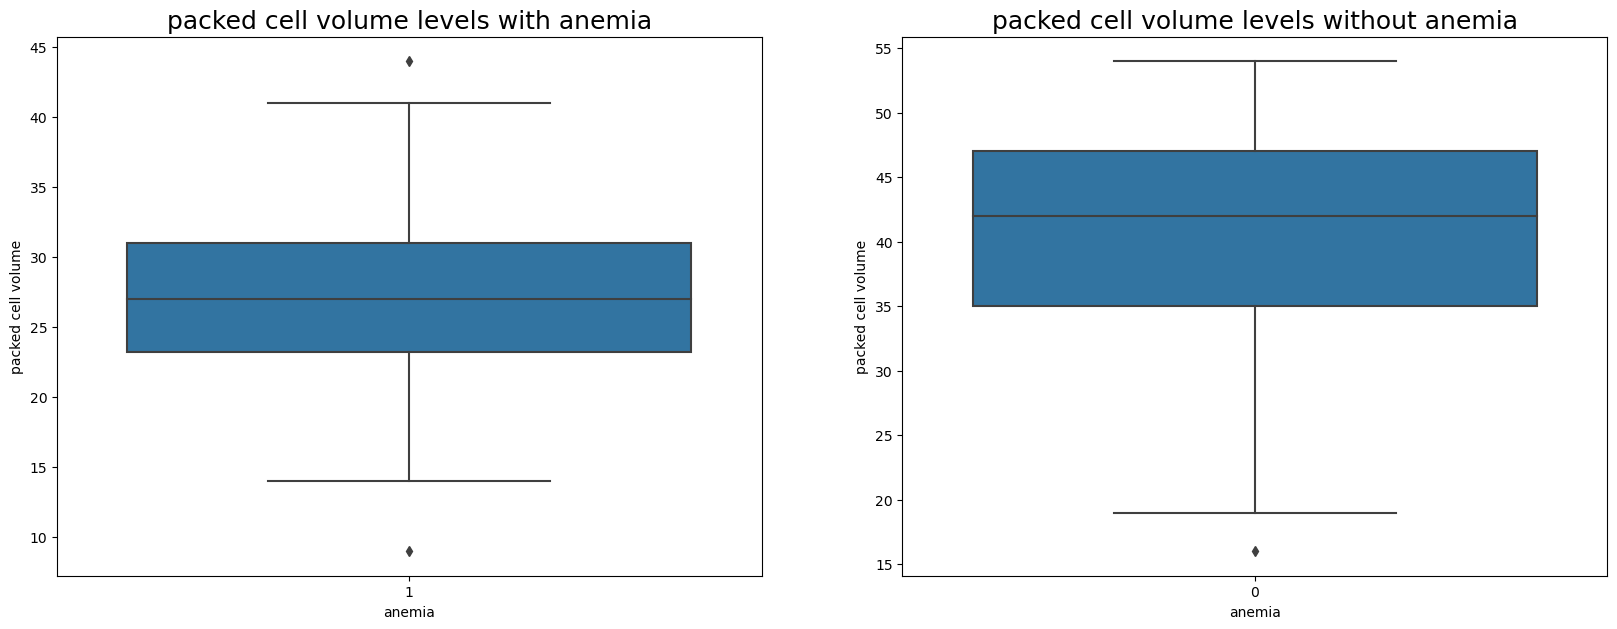

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(
    x='anemia',
    y='packed cell volume',
    data=data[['anemia','packed cell volume']].loc[(data['anemia'] == 1)&(data['packed cell volume'].notnull())],
    ax=axes[0])
sns.boxplot(
    x='anemia',
    y='packed cell volume',
    data=data[['anemia','packed cell volume']].loc[(data['anemia'] == 0)&(data['packed cell volume'].notnull())],
    ax =axes[1])
axes[0].set_title('packed cell volume levels with anemia', fontsize=18); 
axes[1].set_title('packed cell volume levels without anemia', fontsize=18)
plt.show()

C:\Users\Amiksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='packed cell volume', ylabel='hemoglobin'>

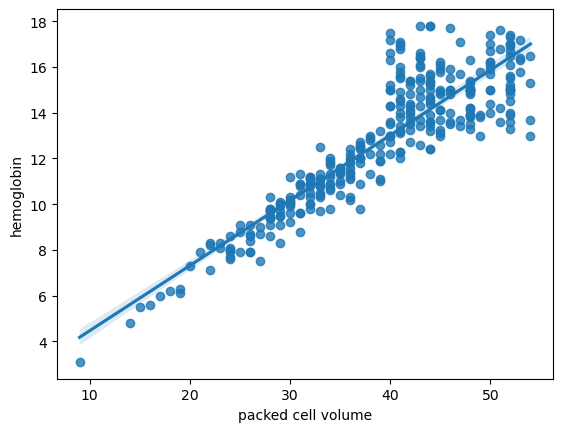

In [106]:
sns.regplot(data['packed cell volume'],data['hemoglobin'])

In [107]:
data[['packed cell volume','hemoglobin','anemia']].corr()

,packed cell volume,hemoglobin,anemia
packed cell volume,1.000000,0.895094,-0.564253
hemoglobin,0.895094,1.000000,-0.601843
anemia,-0.564253,-0.601843,1.000000


In [108]:
data.loc[data['packed cell volume'].isnull()].describe()

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
count,71.000000,68.000000,71.000000,52.000000,52.000000,71.000000,71.000000,63.000000,63.000000,42.000000,...,0.0,8.000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,135.507042,52.411765,77.756912,1.015673,1.307692,0.394366,149.563380,64.439683,4.185714,136.500000,...,NaN,8612.500,4.686577,0.422535,0.140845,0.943662,0.281690,0.338028,0.408451,0.056338
std,79.315441,18.523269,13.610084,0.004647,1.291578,1.034807,71.647895,60.650664,7.363858,7.664457,...,NaN,3194.834,0.601627,0.497479,0.350338,0.232214,0.453025,0.476405,0.495046,0.232214
min,13.000000,2.000000,50.000000,1.010000,0.000000,0.000000,76.000000,15.000000,0.500000,113.000000,...,NaN,4200.000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.500000,45.000000,70.000000,1.010000,0.000000,0.000000,103.000000,26.500000,1.200000,132.000000,...,NaN,6250.000,4.912017,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,122.000000,55.000000,73.580247,1.015000,1.000000,0.000000,116.000000,46.000000,1.900000,136.000000,...,NaN,9650.000,4.912017,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,194.500000,67.000000,90.000000,1.020000,2.000000,0.000000,171.000000,83.000000,4.000000,139.750000,...,NaN,10400.000,4.912017,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,365.000000,80.000000,120.000000,1.025000,4.000000,4.000000,425.000000,391.000000,48.100000,163.000000,...,NaN,13200.000,6.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [110]:
x = data[['hemoglobin']].loc[(data['packed cell volume'].notnull())]
y = data['packed cell volume'].loc[(data['packed cell volume'].notnull())]

model.fit(x,y)
model.score(x,y)

0.8011937878895059

In [111]:
print('y = {} x + {}'.format(model.coef_ , model.intercept_))

y = [2.80969261] x + 3.2046230662399537


In [112]:
#preparing the index of the missing values
to_pred = data['packed cell volume'].loc[(data['packed cell volume'].isnull())].index
to_pred

Int64Index([ 13,  16,  17,  23,  28,  30,  34,  38,  41,  45,  57,  59,  60,
             61,  64,  66,  67,  72,  75,  82,  83,  85,  86,  88,  89,  95,
            100, 104, 109, 113, 114, 116, 118, 119, 120, 122, 125, 129, 136,
            138, 140, 142, 143, 146, 148, 156, 165, 166, 175, 183, 186, 192,
            194, 195, 197, 203, 209, 211, 215, 221, 222, 224, 228, 230, 232,
            233, 247, 273, 319, 324, 365],
           dtype='int64')

In [113]:
for i in to_pred:
    data['packed cell volume'].iloc[i] = ((data['hemoglobin'].iloc[i] * 2.81)+ 3.20)

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\1685370256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['packed cell volume'].iloc[i] = ((data['hemoglobin'].iloc[i] * 2.81)+ 3.20)


In [114]:
data['packed cell volume'].isnull().sum()

0

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      400 non-null    float64
 3   ur_specific_gravity      353 non-null    float64
 4   ur_albumin               354 non-null    float64
 5   ur_sugar                 400 non-null    float64
 6   red_blood_cells          400 non-null    object 
 7   ur_pus_cell              335 non-null    object 
 8   ur_ pus_cell clumps      400 non-null    object 
 9   ur_bacteria              400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [116]:
data.isnull().sum()

id                           0
age                          9
Dias_blood_pressure          0
ur_specific_gravity         47
ur_albumin                  46
ur_sugar                     0
red_blood_cells              0
ur_pus_cell                 65
ur_ pus_cell clumps          0
ur_bacteria                  0
blood glucose random         0
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                   0
packed cell volume           0
white blood cell count     106
red blood cell count         0
diabetes                     0
anemia                       0
ckd                          0
pedal edema                  0
poor                         0
hypertension                 0
coronary artery disease      0
dtype: int64

In [117]:
#Age :

data.loc[(data.age.isnull())]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease
30,30,NaN,70.0,NaN,NaN,0.0,normal,NaN,notpresent,notpresent,...,40.464628,NaN,4.912017,1,0,1,0,0,1,0
73,73,NaN,100.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,14.000000,6300.0,3.383333,0,1,1,1,0,1,0
112,112,NaN,60.0,1.015,3.0,0.0,abnormal,abnormal,notpresent,notpresent,...,33.000000,NaN,4.912017,0,0,1,0,0,0,0
116,116,NaN,70.0,1.015,4.0,0.0,abnormal,normal,notpresent,notpresent,...,40.464628,NaN,4.912017,0,0,1,1,0,0,0
117,117,NaN,70.0,1.020,0.0,0.0,abnormal,NaN,notpresent,notpresent,...,37.000000,9800.0,4.400000,0,0,1,0,0,0,0
169,169,NaN,70.0,1.010,0.0,2.0,abnormal,normal,notpresent,notpresent,...,27.000000,NaN,3.383333,1,1,1,0,0,1,0
191,191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,26.000000,9200.0,3.400000,1,0,1,0,1,1,0
203,203,NaN,90.0,NaN,NaN,0.0,abnormal,NaN,notpresent,notpresent,...,27.085000,NaN,3.383333,1,1,1,0,0,1,0
268,268,NaN,80.0,NaN,NaN,0.0,normal,NaN,notpresent,notpresent,...,53.000000,8500.0,4.900000,0,0,0,0,0,0,0


In [118]:
data.loc[(data.age.isnull())].isnull().sum().sum()

30

In [119]:
data.dropna(subset=['age'], inplace = True)
data.age.isnull().sum()

0

In [120]:
data.reset_index(drop=True, inplace=True)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       391 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      391 non-null    float64
 3   ur_specific_gravity      347 non-null    float64
 4   ur_albumin               348 non-null    float64
 5   ur_sugar                 391 non-null    float64
 6   red_blood_cells          391 non-null    object 
 7   ur_pus_cell              330 non-null    object 
 8   ur_ pus_cell clumps      391 non-null    object 
 9   ur_bacteria              391 non-null    object 
 10  blood glucose random     391 non-null    float64
 11  blood urea               372 non-null    float64
 12  serum creatinine         374 non-null    float64
 13  sodium                   307 non-null    float64
 14  potassium                3

In [122]:
#'urbacteria','ur pus_cell clumps' ,'ur_pus_cell' :

data.loc[(data.ur_bacteria.isnull())|(data['ur_ pus_cell clumps'].isnull())]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,red_blood_cells,ur_pus_cell,ur_ pus_cell clumps,ur_bacteria,...,packed cell volume,white blood cell count,red blood cell count,diabetes,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease


In [123]:
data[['blood urea','serum creatinine','white blood cell count']].loc[(data.ur_bacteria.isnull())|(data['ur_ pus_cell clumps'].isnull())]

,blood urea,serum creatinine,white blood cell count


In [124]:
data.ur_bacteria.unique()

array(['notpresent', 'present'], dtype=object)

In [125]:
data['ur_ pus_cell clumps'].unique()

array(['notpresent', 'present'], dtype=object)

In [127]:
data['ur_pus_cell'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [128]:
data['ur_pus_cell'] = data['ur_pus_cell'].fillna('normal')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       391 non-null    int64  
 1   age                      391 non-null    float64
 2   Dias_blood_pressure      391 non-null    float64
 3   ur_specific_gravity      347 non-null    float64
 4   ur_albumin               348 non-null    float64
 5   ur_sugar                 391 non-null    float64
 6   red_blood_cells          391 non-null    object 
 7   ur_pus_cell              391 non-null    object 
 8   ur_ pus_cell clumps      391 non-null    object 
 9   ur_bacteria              391 non-null    object 
 10  blood glucose random     391 non-null    float64
 11  blood urea               372 non-null    float64
 12  serum creatinine         374 non-null    float64
 13  sodium                   307 non-null    float64
 14  potassium                3

In [130]:
#encoding red blood cells
dummy_rbc = pd.get_dummies(data['red_blood_cells'] )
data = data.join(dummy_rbc)
data.drop(['red_blood_cells','normal'] , axis = 1 , inplace = True)
data.rename(columns={'abnormal': 'abnormal_red_blood_cells'}, inplace = True)
data[['abnormal_red_blood_cells']]

,abnormal_red_blood_cells
0,0
1,0
2,0
3,0
4,0
...,...
386,0
387,0
388,0
389,0


In [131]:
#encoding urine pus cell
dummy_upc = pd.get_dummies(data['ur_pus_cell'] )
data = data.join(dummy_upc)
data.drop(['ur_pus_cell','normal'] , axis = 1 , inplace = True)
data.rename(columns={'abnormal': 'abnormal_ur_pus_cell'}, inplace = True)
data[['abnormal_ur_pus_cell']]

,abnormal_ur_pus_cell
0,0
1,0
2,0
3,1
4,0
...,...
386,0
387,0
388,0
389,0


In [132]:
#encoding ur_pus_cell clumps
dummy_upcc = pd.get_dummies(data['ur_ pus_cell clumps'] )
data = data.join(dummy_upcc)
data.drop(['ur_ pus_cell clumps','notpresent'] , axis = 1 , inplace = True)
data.rename(columns={'present': 'ur_pus_cell_clumps_present'}, inplace = True)
data[['ur_pus_cell_clumps_present']]

,ur_pus_cell_clumps_present
0,0
1,0
2,0
3,1
4,0
...,...
386,0
387,0
388,0
389,0


In [133]:
#encoding urine bacteria
dummy_ub = pd.get_dummies(data['ur_bacteria'] )
data = data.join(dummy_ub)
data.drop(['ur_bacteria','notpresent'] , axis = 1 , inplace = True)
data.rename(columns={'present': 'ur_bacteria_present'}, inplace = True)
data[['ur_bacteria_present']]

,ur_bacteria_present
0,0
1,0
2,0
3,0
4,0
...,...
386,0
387,0
388,0
389,0


In [134]:
data.describe()

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
count,391.000000,391.000000,391.000000,347.000000,348.000000,391.000000,391.000000,372.000000,374.000000,307.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,200.820972,51.483376,76.440980,1.017464,1.000000,0.398977,144.120205,57.040860,3.056551,137.548860,...,0.145780,0.618926,0.189258,0.207161,0.363171,0.086957,0.250639,0.189258,0.107417,0.056266
std,116.142524,17.169714,13.527078,0.005732,1.343144,1.047291,76.103293,50.614707,5.793520,10.494438,...,0.353338,0.486273,0.392216,0.405791,0.481530,0.282132,0.433936,0.392216,0.310039,0.230730
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.500000,42.000000,70.000000,1.010000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202.000000,55.000000,80.000000,1.020000,0.000000,0.000000,116.000000,41.500000,1.250000,138.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.500000,64.500000,80.000000,1.020000,2.000000,0.000000,150.000000,65.250000,2.800000,142.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
data.loc[(data.isnull().sum(axis=1) >= 4)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
23,23,21.0,70.000000,1.010,0.0,0.0,116.0,NaN,NaN,NaN,...,1,1,0,1,0,0,1,0,0,0
28,28,75.0,70.000000,NaN,1.0,3.0,123.0,31.0,1.4,NaN,...,0,1,0,0,0,0,0,0,0,0
54,55,35.0,80.000000,1.005,3.0,0.0,116.0,NaN,NaN,NaN,...,0,1,1,0,0,0,1,0,0,0
58,59,59.0,100.000000,NaN,NaN,0.0,103.0,96.0,6.4,NaN,...,1,1,0,0,1,0,1,0,0,0
63,64,55.0,80.000000,1.010,0.0,0.0,146.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
66,67,45.0,80.000000,1.020,3.0,0.0,425.0,NaN,NaN,NaN,...,0,1,0,1,0,0,0,1,0,0
84,86,56.0,80.000000,NaN,NaN,0.0,415.0,37.0,1.9,NaN,...,0,1,0,0,0,0,0,0,0,0
102,104,55.0,90.000000,NaN,NaN,0.0,143.0,88.0,2.0,NaN,...,0,1,1,1,1,0,0,0,0,0
107,109,54.0,70.000000,NaN,NaN,0.0,233.0,50.1,1.9,NaN,...,0,1,0,0,0,0,0,0,0,0
110,113,61.0,90.000000,1.015,0.0,2.0,103.0,NaN,NaN,NaN,...,1,1,0,1,0,0,1,0,0,0


In [136]:
data.loc[(data.isnull().sum(axis=1) >= 4)].describe()

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
count,24.000000,24.000000,24.000000,14.000000,15.000000,24.000000,24.000000,11.000000,10.00000,0.0,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.0,24.0
mean,155.625000,51.833333,76.453775,1.014643,0.933333,0.291667,156.791667,48.009091,6.96000,NaN,...,0.166667,0.916667,0.166667,0.208333,0.333333,0.0,0.250000,0.125000,0.0,0.0
std,82.807694,17.965345,9.648413,0.005706,1.334523,0.806450,96.745735,26.131225,14.52769,NaN,...,0.380693,0.282330,0.380693,0.414851,0.481543,0.0,0.442326,0.337832,0.0,0.0
min,23.000000,2.000000,60.000000,1.005000,0.000000,0.000000,100.000000,15.000000,1.40000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
25%,81.250000,44.750000,70.000000,1.010000,0.000000,0.000000,106.000000,29.500000,1.82500,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
50%,163.000000,57.500000,76.790123,1.015000,0.000000,0.000000,116.000000,37.000000,1.95000,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
75%,217.000000,61.250000,80.000000,1.020000,2.000000,0.000000,143.750000,60.000000,2.40000,NaN,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.250000,0.000000,0.0,0.0
max,315.000000,75.000000,100.000000,1.025000,3.000000,3.000000,425.000000,96.000000,48.10000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0


In [137]:
data.dropna(axis=0, thresh=23,inplace=True)
data.reset_index(drop=True, inplace=True)

In [138]:
data.loc[(data.isnull().sum(axis=1) >= 4)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present


In [139]:
data.isnull().sum()

id                             0
age                            0
Dias_blood_pressure            0
ur_specific_gravity           34
ur_albumin                    34
ur_sugar                       0
blood glucose random           0
blood urea                     6
serum creatinine               3
sodium                        60
potassium                     61
hemoglobin                     0
packed cell volume             0
white blood cell count        84
red blood cell count           0
diabetes                       0
anemia                         0
ckd                            0
pedal edema                    0
poor                           0
hypertension                   0
coronary artery disease        0
abnormal_red_blood_cells       0
abnormal_ur_pus_cell           0
ur_pus_cell_clumps_present     0
ur_bacteria_present            0
dtype: int64

In [140]:
#blood urea / serum creatinine :

data.corr()

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
id,1.000000,-0.194272,-0.248117,0.647541,-0.557193,-0.255858,-0.295800,-0.308522,-0.285540,0.362943,...,-0.276344,-0.846281,-0.323992,-0.387192,-0.557773,-0.223782,-0.400349,-0.358101,-0.285976,-0.128672
age,-0.194272,1.000000,0.168406,-0.220201,0.138932,0.182925,0.243863,0.205313,0.125258,-0.100046,...,0.055061,0.239631,0.128336,0.172838,0.394838,0.242300,0.151913,0.133100,0.165830,0.045508
Dias_blood_pressure,-0.248117,0.168406,1.000000,-0.222067,0.168558,0.197382,0.154696,0.184097,0.184751,-0.118041,...,0.176984,0.303485,0.034168,0.188077,0.287768,0.089668,0.218590,0.153860,0.062020,0.115602
ur_specific_gravity,0.647541,-0.220201,-0.222067,1.000000,-0.483609,-0.309640,-0.357889,-0.316004,-0.360649,0.409861,...,-0.241821,-0.734797,-0.296686,-0.281042,-0.424439,-0.190679,-0.327835,-0.375809,-0.314810,-0.237052
ur_albumin,-0.557193,0.138932,0.168558,-0.483609,1.000000,0.296563,0.337111,0.461564,0.405471,-0.457738,...,0.366526,0.647708,0.473172,0.376764,0.548474,0.282625,0.295673,0.550060,0.423336,0.386363
ur_sugar,-0.255858,0.182925,0.197382,-0.309640,0.296563,1.000000,0.679465,0.135044,0.117685,-0.065498,...,0.032773,0.313029,0.134631,0.070684,0.280767,0.232217,0.098726,0.209340,0.169121,0.119831
blood glucose random,-0.295800,0.243863,0.154696,-0.357889,0.337111,0.679465,1.000000,0.127286,0.062605,-0.146179,...,0.101133,0.386991,0.118026,0.178952,0.402823,0.218369,0.182438,0.253112,0.209288,0.084471
blood urea,-0.308522,0.205313,0.184097,-0.316004,0.461564,0.135044,0.127286,1.000000,0.654132,-0.320809,...,0.454321,0.390379,0.354004,0.282097,0.390010,0.231575,0.275037,0.359920,0.188966,0.161711
serum creatinine,-0.285540,0.125258,0.184751,-0.360649,0.405471,0.117685,0.062605,0.654132,1.000000,-0.690788,...,0.271136,0.314054,0.213349,0.137165,0.272766,0.219262,0.228632,0.188797,0.063397,0.061744
sodium,0.362943,-0.100046,-0.118041,0.409861,-0.457738,-0.065498,-0.146179,-0.320809,-0.690788,1.000000,...,-0.231705,-0.376258,-0.167578,-0.186508,-0.348091,-0.236587,-0.277748,-0.203517,-0.182696,-0.091149


C:\Users\Amiksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blood urea', ylabel='serum creatinine'>

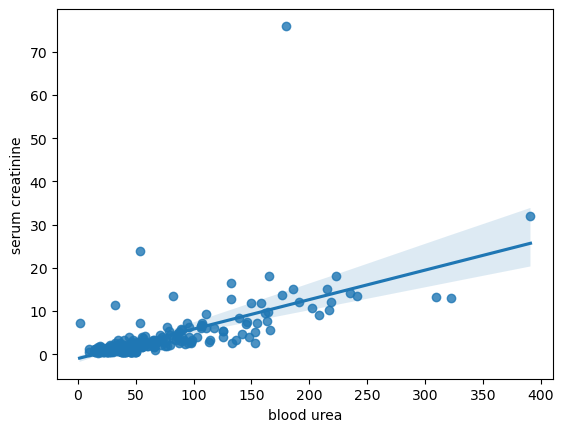

In [141]:
sns.regplot(data['blood urea'],data['serum creatinine'])

In [142]:
data.loc[(data['blood urea'].isnull())]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
51,54,63.0,80.0,1.010,2.0,2.0,116.0,NaN,3.4,136.0,...,0,1,0,0,1,1,0,0,0,0
119,134,47.0,100.0,1.010,NaN,0.0,122.0,NaN,16.9,138.0,...,0,1,0,0,0,0,0,0,0,0
245,276,20.0,60.0,1.025,0.0,0.0,116.0,NaN,NaN,137.0,...,0,0,0,0,0,0,0,0,0,0
280,312,80.0,70.0,1.020,0.0,0.0,116.0,NaN,NaN,135.0,...,0,0,0,0,0,0,0,0,0,0
301,334,24.0,80.0,1.025,0.0,0.0,125.0,NaN,NaN,136.0,...,0,0,0,0,0,0,0,0,0,0
345,378,71.0,60.0,1.025,0.0,0.0,116.0,NaN,0.9,140.0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
w = data[['serum creatinine']].loc[(data['blood urea'].notnull())&(data['serum creatinine'].notnull())]
z = data['blood urea'].loc[(data['blood urea'].notnull())&(data['serum creatinine'].notnull())]
model.fit(w,z)
print(' blood urea = {} x serum creatinie + {}'.format(model.coef_ , model.intercept_ ))

 blood urea = [6.26884739] x serum creatinie + 39.04176856296644


In [144]:
indexx = [51,119,345]
for i in indexx:
    data.at[i, 'blood urea'] = (6.269*data['serum creatinine'].iloc[i] + 39.042)

In [145]:
my_list = ['ur_albumin','ur_sugar','ckd','abnormal_ur_pus_cell','ur_pus_cell_clumps_present', 'ur_bacteria_present']

data.loc[data[my_list].eq(0).all(1)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
220,250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,1.2,135.0,...,0,0,0,0,0,0,0,0,0,0
221,251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,1.0,150.0,...,0,0,0,0,0,0,0,0,0,0
222,252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,0.6,147.0,...,0,0,0,0,0,0,0,0,0,0
223,253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,1.2,135.0,...,0,0,0,0,0,0,0,0,0,0
224,254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,0.8,135.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,0,0,0,0,0,0,0,0,0,0
363,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,0,0,0,0,0,0,0,0,0,0
364,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,0,0,0,0,0,0,0,0,0,0
365,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
print('average blood urea for healthy people = ',data['blood urea'].loc[data[my_list].eq(0).all(1)].mean())
print('average serum creatinine for healthy people =',data['serum creatinine'].loc[data[my_list].eq(0).all(1)].mean())

average blood urea for healthy people =  32.71202928571429
average serum creatinine for healthy people = 0.8700000000000001


In [147]:
data['blood urea'] = data['blood urea'].fillna(32.71)
data['serum creatinine'] = data['serum creatinine'].fillna(0.87)

In [148]:
# missing values in cases of kidney disease
data.loc[data.ckd == 0].isnull().sum()

id                            0
age                           0
Dias_blood_pressure           0
ur_specific_gravity           4
ur_albumin                    4
ur_sugar                      0
blood glucose random          0
blood urea                    0
serum creatinine              0
sodium                        3
potassium                     3
hemoglobin                    0
packed cell volume            0
white blood cell count        7
red blood cell count          0
diabetes                      0
anemia                        0
ckd                           0
pedal edema                   0
poor                          0
hypertension                  0
coronary artery disease       0
abnormal_red_blood_cells      0
abnormal_ur_pus_cell          0
ur_pus_cell_clumps_present    0
ur_bacteria_present           0
dtype: int64

In [149]:
# missing values in cases of not kidney disease patients
data.loc[data.ckd == 1].isnull().sum()

id                             0
age                            0
Dias_blood_pressure            0
ur_specific_gravity           30
ur_albumin                    30
ur_sugar                       0
blood glucose random           0
blood urea                     0
serum creatinine               0
sodium                        57
potassium                     58
hemoglobin                     0
packed cell volume             0
white blood cell count        77
red blood cell count           0
diabetes                       0
anemia                         0
ckd                            0
pedal edema                    0
poor                           0
hypertension                   0
coronary artery disease        0
abnormal_red_blood_cells       0
abnormal_ur_pus_cell           0
ur_pus_cell_clumps_present     0
ur_bacteria_present            0
dtype: int64

In [150]:
data[['white blood cell count' , 'potassium', 'sodium' , 'ur_specific_gravity' , 'ur_albumin', 'ckd']].groupby('ckd').mean()

,white blood cell count,potassium,sodium,ur_specific_gravity,ur_albumin
ckd,,,,,
0,7677.142857,4.333333,141.743056,1.022413,0.000000
1,9102.097902,4.898148,133.843558,1.013947,1.757895


In [151]:
#groupping the columns with missing values by the ckd variable
data[['white blood cell count' , 'potassium', 'sodium' , 'ur_specific_gravity' , 'ur_albumin', 'ckd']].groupby('ckd').describe()

white blood cell count                                                    \
                     count         mean          std     min     25%     50%   
ckd                                                                            
0                    140.0  7677.142857  1839.429958  4300.0  6300.0  7450.0   
1                    143.0  9102.097902  3661.129444  2200.0  6700.0  8800.0   

                      potassium            ... ur_specific_gravity         \
         75%      max     count      mean  ...                 75%    max   
ckd                                        ...                              
0     9225.0  11000.0     144.0  4.333333  ...               1.025  1.025   
1    10800.0  26400.0     162.0  4.898148  ...               1.015  1.025   

    ur_albumin                                               
         count      mean       std  min  25%  50%  75%  max  
ckd                                                          
0        143.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
1        190.0  1.757895  1.358616  0.0  1.0  2.0  3.0  5.0  

[2 rows x 40 columns]

In [152]:
data.loc[(data['ckd'] == 1)&(data['sodium'] < 100)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
21,21,60.0,90.0,NaN,NaN,0.0,103.0,180.0,76.0,4.5,...,0,1,0,0,1,1,1,0,0,0


In [153]:
data.loc[(data['ckd'] == 1)&(data['sodium'] < 100)].isnull().sum()

id                            0
age                           0
Dias_blood_pressure           0
ur_specific_gravity           1
ur_albumin                    1
ur_sugar                      0
blood glucose random          0
blood urea                    0
serum creatinine              0
sodium                        0
potassium                     1
hemoglobin                    0
packed cell volume            0
white blood cell count        0
red blood cell count          0
diabetes                      0
anemia                        0
ckd                           0
pedal edema                   0
poor                          0
hypertension                  0
coronary artery disease       0
abnormal_red_blood_cells      0
abnormal_ur_pus_cell          0
ur_pus_cell_clumps_present    0
ur_bacteria_present           0
dtype: int64

In [154]:
#let's replace the missing values in these columns with the mean value for healthy and kidney disease patients. and drop the row 21

mean_wbcc_notckd = data['white blood cell count'].loc[(data['white blood cell count'].notnull())&(data.ckd == 0)].mean()
mean_wbcc_ckd = data['white blood cell count'].loc[(data['white blood cell count'].notnull())&(data.ckd == 1)].mean()
mean_pot_notckd = data['potassium'].loc[(data['potassium'].notnull())&(data.ckd == 0)].mean()
mean_pot_ckd = data['potassium'].loc[(data['potassium'].notnull())&(data.ckd == 1)].mean()
mean_sod_notckd = data['sodium'].loc[(data['sodium'].notnull())&(data.ckd == 0)].mean()
mean_sod_ckd = data['sodium'].loc[(data['sodium'].notnull())&(data.ckd == 1)].mean()
mean_usg_notckd = data['ur_specific_gravity'].loc[(data['ur_specific_gravity'].notnull())&(data.ckd == 0)].mean()
mean_usg_ckd = data['ur_specific_gravity'].loc[(data['ur_specific_gravity'].notnull())&(data.ckd == 1)].mean()
mean_ualb_notckd = data['ur_albumin'].loc[(data['ur_albumin'].notnull())&(data.ckd == 0)].mean()
mean_ualb_ckd = data['ur_albumin'].loc[(data['ur_albumin'].notnull())&(data.ckd == 1)].mean()

In [155]:
data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd == 0)] = data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd == 0)].fillna(mean_wbcc_notckd)

data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd == 1)] = data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd == 1)].fillna(mean_wbcc_ckd )

data['potassium'].loc[(data['potassium'].isnull())&(data.ckd == 0)] = data['potassium'].loc[(data['potassium'].isnull())&(data.ckd == 0)].fillna(mean_pot_notckd )

data['potassium'].loc[(data['potassium'].isnull())&(data.ckd == 1)] = data['potassium'].loc[(data['potassium'].isnull())&(data.ckd == 1)].fillna(mean_pot_ckd )
    
data['sodium'].loc[(data['sodium'].isnull())&(data.ckd == 0)] = data['sodium'].loc[(data['sodium'].isnull())&(data.ckd == 0)].fillna(mean_sod_notckd )

data['sodium'].loc[(data['sodium'].isnull())&(data.ckd == 1)] = data['sodium'].loc[(data['sodium'].isnull())&(data.ckd == 1)].fillna(mean_sod_ckd )

data['ur_specific_gravity'].loc[(data['ur_specific_gravity'].isnull())&(data.ckd == 0)] = data['ur_specific_gravity'].loc[(data['ur_specific_gravity'].isnull())&(data.ckd == 0)].fillna(mean_usg_notckd )
data['ur_specific_gravity'].loc[(data['ur_specific_gravity'].isnull())&(data.ckd == 1)] = data['ur_specific_gravity'].loc[(data['ur_specific_gravity'].isnull())&(data.ckd == 1)].fillna(mean_usg_ckd )

data['ur_albumin'].loc[(data['ur_albumin'].isnull())&(data.ckd == 0)] = data['ur_albumin'].loc[(data['ur_albumin'].isnull())&(data.ckd == 0)].fillna(mean_ualb_notckd )

data['ur_albumin'].loc[(data['ur_albumin'].isnull())&(data.ckd == 1)] =data['ur_albumin'].loc[(data['ur_albumin'].isnull())&(data.ckd == 1)].fillna(mean_ualb_ckd )

C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\857790189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd == 0)] = data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd == 0)].fillna(mean_wbcc_notckd)
C:\Users\Amiksha\AppData\Local\Temp\ipykernel_26708\857790189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd == 1)] = data['white blood cell count'].loc[(data['white blood cell count'].isnull())&(data.ckd 

In [156]:
data = data.drop(index=21)
data.loc[(data['ckd'] == 1)&(data['sodium'] < 100)]

,id,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present


In [157]:
data.isnull().sum()

id                            0
age                           0
Dias_blood_pressure           0
ur_specific_gravity           0
ur_albumin                    0
ur_sugar                      0
blood glucose random          0
blood urea                    0
serum creatinine              0
sodium                        0
potassium                     0
hemoglobin                    0
packed cell volume            0
white blood cell count        0
red blood cell count          0
diabetes                      0
anemia                        0
ckd                           0
pedal edema                   0
poor                          0
hypertension                  0
coronary artery disease       0
abnormal_red_blood_cells      0
abnormal_ur_pus_cell          0
ur_pus_cell_clumps_present    0
ur_bacteria_present           0
dtype: int64

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 366
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          366 non-null    int64  
 1   age                         366 non-null    float64
 2   Dias_blood_pressure         366 non-null    float64
 3   ur_specific_gravity         366 non-null    float64
 4   ur_albumin                  366 non-null    float64
 5   ur_sugar                    366 non-null    float64
 6   blood glucose random        366 non-null    float64
 7   blood urea                  366 non-null    float64
 8   serum creatinine            366 non-null    float64
 9   sodium                      366 non-null    float64
 10  potassium                   366 non-null    float64
 11  hemoglobin                  366 non-null    float64
 12  packed cell volume          366 non-null    float64
 13  white blood cell count      366 non

In [159]:
data.ckd.value_counts()

1    219
0    147
Name: ckd, dtype: int64

In [160]:
#Data Scaling
data.iloc[:,1:15]

,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,133.843558,4.898148,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,116.0,18.0,0.8,133.843558,4.898148,11.3,38.0,6000.0,4.912017
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.843558,4.898148,9.6,31.0,7500.0,3.383333
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,133.843558,4.898148,11.6,35.0,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000
363,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000
364,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000
365,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000


In [161]:
#selecting the continuous variables
cont_data = data.iloc[:,1:15]
cont_data

,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,133.843558,4.898148,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,116.0,18.0,0.8,133.843558,4.898148,11.3,38.0,6000.0,4.912017
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.843558,4.898148,9.6,31.0,7500.0,3.383333
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,133.843558,4.898148,11.6,35.0,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000
363,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000
364,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000
365,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000


In [162]:
#scaling the continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cont_data_scaled = scaler.fit_transform(cont_data)
df_scaled = pd.DataFrame(cont_data_scaled)
df_scaled.rename(columns={0 : 'age', 1 :'Dias_blood_pressure', 2 :'ur_specific_gravity', 3 :'ur_albumin',
       4 :'ur_sugar', 5 :'blood glucose random', 6 :'blood urea', 7 :'serum creatinine',
       8 :'sodium', 9 :'potassium',10  :'hemoglobin', 11 :'packed cell volume',
        12 :'white blood cell count', 13 :'red blood cell count'}, inplace = True)
df_scaled

,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,0.517241,0.230769,0.75,0.2,0.0,0.211538,0.088575,0.025316,0.505823,0.053891,0.836735,0.777778,0.231405,0.525424
1,0.045977,0.000000,0.75,0.8,0.0,0.200855,0.042362,0.012658,0.505823,0.053891,0.557823,0.644444,0.157025,0.476613
2,0.678161,0.230769,0.25,0.4,0.6,0.856838,0.132221,0.044304,0.505823,0.053891,0.442177,0.488889,0.219008,0.217514
3,0.517241,0.153846,0.00,0.8,0.0,0.202991,0.139923,0.107595,0.118644,0.000000,0.551020,0.511111,0.185950,0.305085
4,0.551724,0.230769,0.25,0.4,0.0,0.179487,0.062901,0.031646,0.505823,0.053891,0.578231,0.577778,0.210744,0.423729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.597701,0.230769,0.75,0.0,0.0,0.252137,0.121951,0.003165,0.779661,0.053933,0.857143,0.844444,0.185950,0.474576
362,0.448276,0.153846,1.00,0.0,0.0,0.113248,0.075738,0.025316,0.627119,0.022472,0.911565,1.000000,0.231405,0.694915
363,0.103448,0.230769,0.75,0.0,0.0,0.166667,0.062901,0.006329,0.559322,0.042697,0.863946,0.888889,0.181818,0.559322
364,0.160920,0.076923,1.00,0.0,0.0,0.196581,0.124519,0.018987,0.525424,0.053933,0.755102,0.933333,0.206612,0.644068


In [163]:
df_scaled.reset_index(drop=True, inplace=True)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     366 non-null    float64
 1   Dias_blood_pressure     366 non-null    float64
 2   ur_specific_gravity     366 non-null    float64
 3   ur_albumin              366 non-null    float64
 4   ur_sugar                366 non-null    float64
 5   blood glucose random    366 non-null    float64
 6   blood urea              366 non-null    float64
 7   serum creatinine        366 non-null    float64
 8   sodium                  366 non-null    float64
 9   potassium               366 non-null    float64
 10  hemoglobin              366 non-null    float64
 11  packed cell volume      366 non-null    float64
 12  white blood cell count  366 non-null    float64
 13  red blood cell count    366 non-null    float64
dtypes: float64(14)
memory usage: 40.2 KB


In [164]:
#selecting categorical data
cat_data = data.iloc[0:,16:26]
cat_data.reset_index(drop=True, inplace=True)
cat_data

,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0
3,1,1,1,1,1,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0


In [165]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   anemia                      366 non-null    uint8
 1   ckd                         366 non-null    uint8
 2   pedal edema                 366 non-null    uint8
 3   poor                        366 non-null    uint8
 4   hypertension                366 non-null    uint8
 5   coronary artery disease     366 non-null    uint8
 6   abnormal_red_blood_cells    366 non-null    uint8
 7   abnormal_ur_pus_cell        366 non-null    uint8
 8   ur_pus_cell_clumps_present  366 non-null    uint8
 9   ur_bacteria_present         366 non-null    uint8
dtypes: uint8(10)
memory usage: 3.7 KB


In [166]:
#joining the scaled variables with the binary ones.
df = pd.merge(df_scaled, cat_data, left_index=True, right_index=True)

In [167]:
df.isnull().sum()

age                           0
Dias_blood_pressure           0
ur_specific_gravity           0
ur_albumin                    0
ur_sugar                      0
blood glucose random          0
blood urea                    0
serum creatinine              0
sodium                        0
potassium                     0
hemoglobin                    0
packed cell volume            0
white blood cell count        0
red blood cell count          0
anemia                        0
ckd                           0
pedal edema                   0
poor                          0
hypertension                  0
coronary artery disease       0
abnormal_red_blood_cells      0
abnormal_ur_pus_cell          0
ur_pus_cell_clumps_present    0
ur_bacteria_present           0
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         366 non-null    float64
 1   Dias_blood_pressure         366 non-null    float64
 2   ur_specific_gravity         366 non-null    float64
 3   ur_albumin                  366 non-null    float64
 4   ur_sugar                    366 non-null    float64
 5   blood glucose random        366 non-null    float64
 6   blood urea                  366 non-null    float64
 7   serum creatinine            366 non-null    float64
 8   sodium                      366 non-null    float64
 9   potassium                   366 non-null    float64
 10  hemoglobin                  366 non-null    float64
 11  packed cell volume          366 non-null    float64
 12  white blood cell count      366 non-null    float64
 13  red blood cell count        366 non

In [169]:
#Data Study
df.corr(method = "spearman")

,age,Dias_blood_pressure,ur_specific_gravity,ur_albumin,ur_sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,...,anemia,ckd,pedal edema,poor,hypertension,coronary artery disease,abnormal_red_blood_cells,abnormal_ur_pus_cell,ur_pus_cell_clumps_present,ur_bacteria_present
age,1.000000,0.134039,-0.259711,0.228060,0.236780,0.276393,0.317905,0.344636,-0.140078,0.072916,...,0.035650,0.287436,0.140683,0.184743,0.395176,0.263892,0.152608,0.136262,0.184795,0.057569
Dias_blood_pressure,0.134039,1.000000,-0.208252,0.212349,0.198142,0.162764,0.173013,0.309412,-0.142842,0.089449,...,0.184144,0.294309,0.012235,0.151074,0.260202,0.081497,0.183819,0.144686,0.061933,0.132318
ur_specific_gravity,-0.259711,-0.208252,1.000000,-0.546997,-0.308967,-0.311733,-0.386415,-0.585327,0.507434,-0.046483,...,-0.262506,-0.749320,-0.302779,-0.286908,-0.449371,-0.203484,-0.337441,-0.324440,-0.274162,-0.211692
ur_albumin,0.228060,0.212349,-0.546997,1.000000,0.362829,0.301907,0.535374,0.671901,-0.522402,0.115429,...,0.365192,0.731380,0.450479,0.392201,0.576853,0.290615,0.342349,0.525582,0.425291,0.344000
ur_sugar,0.236780,0.198142,-0.308967,0.362829,1.000000,0.532640,0.183306,0.299995,-0.212583,0.056123,...,0.071809,0.350297,0.169465,0.152186,0.328317,0.302896,0.116789,0.243862,0.216442,0.167105
blood glucose random,0.276393,0.162764,-0.311733,0.301907,0.532640,1.000000,0.169458,0.322125,-0.279470,0.090579,...,0.077692,0.374036,0.147057,0.206162,0.371203,0.166439,0.131328,0.255114,0.189049,0.105014
blood urea,0.317905,0.173013,-0.386415,0.535374,0.183306,0.169458,1.000000,0.693945,-0.326087,0.183318,...,0.373114,0.434322,0.299952,0.296825,0.488414,0.246711,0.309379,0.335163,0.244952,0.194728
serum creatinine,0.344636,0.309412,-0.585327,0.671901,0.299995,0.322125,0.693945,1.000000,-0.458455,0.130546,...,0.415233,0.716287,0.363772,0.407102,0.605085,0.301199,0.413984,0.387157,0.297478,0.224860
sodium,-0.140078,-0.142842,0.507434,-0.522402,-0.212583,-0.279470,-0.326087,-0.458455,1.000000,-0.090579,...,-0.282595,-0.605189,-0.268164,-0.303697,-0.427441,-0.166993,-0.303588,-0.352740,-0.303510,-0.164770
potassium,0.072916,0.089449,-0.046483,0.115429,0.056123,0.090579,0.183318,0.130546,-0.090579,1.000000,...,0.058997,0.102266,0.028851,0.054925,0.094366,0.088968,0.053825,0.074379,0.086418,0.045447


<AxesSubplot:>

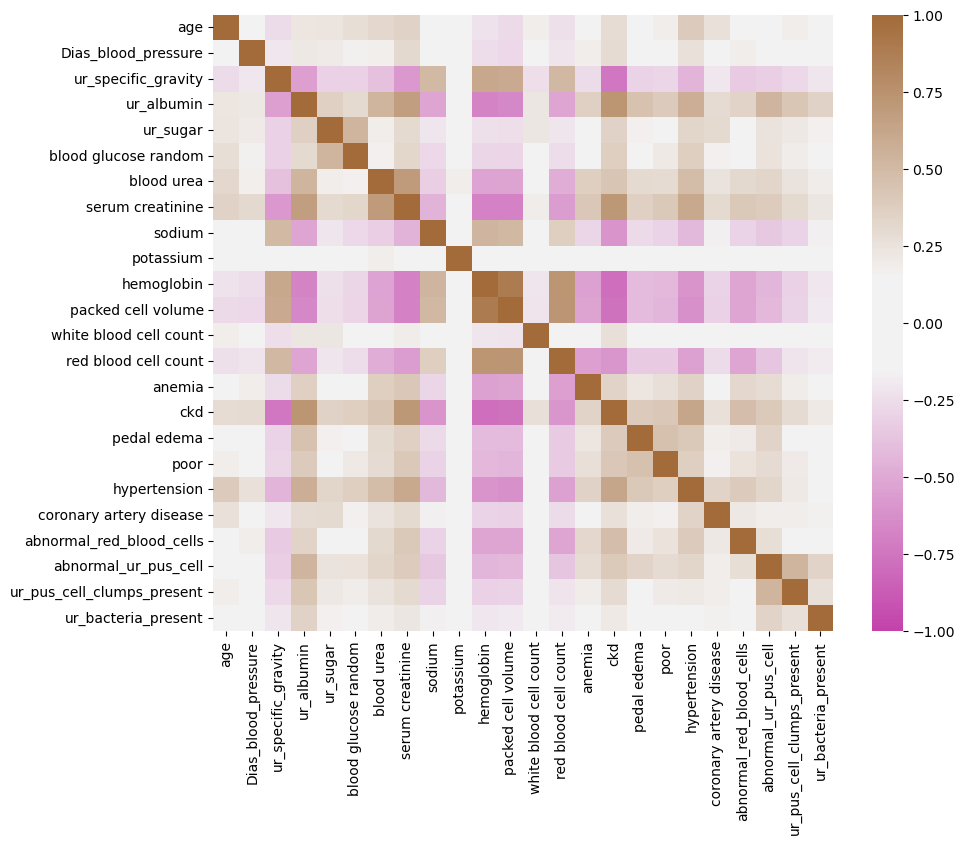

In [170]:
plt.figure(figsize = (10, 8))
cmap = sns.diverging_palette(320, 40, sep=40, as_cmap=True)
sns.heatmap(df.corr(method = "spearman"), vmin=-1, vmax= 1, cmap=cmap)

In [171]:
#correlation between the chronic kidney disease and the rest of the variables
corr_df = df.corr(method = "spearman")
corr_ckd_df = pd.DataFrame(corr_df.ckd)
corr_ckd_df.rename(columns = { 'ckd' : 'ckd_corr'}, inplace = True)
corr_ckd_df.sort_values('ckd_corr')

,ckd_corr
hemoglobin,-0.784875
packed cell volume,-0.768205
ur_specific_gravity,-0.749320
sodium,-0.605189
red blood cell count,-0.594751
potassium,0.102266
ur_bacteria_present,0.207190
coronary artery disease,0.257912
white blood cell count,0.272940
age,0.287436


In [172]:
#Apply logistic regression, and print the confusion matrix to validate your model.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df.drop(['ckd','potassium'] , axis =1)
y = df['ckd']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20) 

In [173]:
logreg = LogisticRegression() 
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.95


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

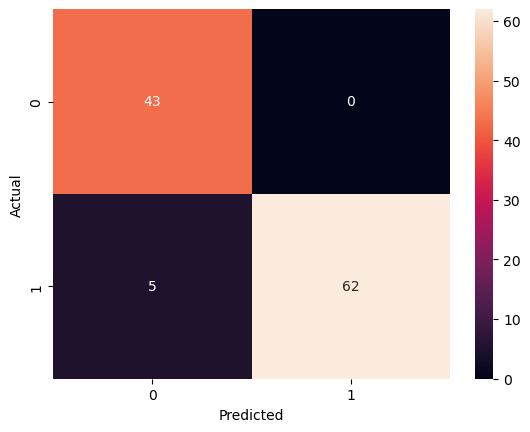

In [174]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.93      0.96        67

    accuracy                           0.95       110
   macro avg       0.95      0.96      0.95       110
weighted avg       0.96      0.95      0.95       110



In [176]:
#Apply KNN and choose the optimal number of neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#trying the knn with 20 neighbors
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test) 
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9181818181818182


C:\Users\Amiksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [177]:
#trying all the possibilities of neighbors between 1 and 30
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.87
Accuracy for k= 2 is: 0.87
Accuracy for k= 3 is: 0.88
Accuracy for k= 4 is: 0.88
Accuracy for k= 5 is: 0.89
Accuracy for k= 6 is: 0.89
Accuracy for k= 7 is: 0.91
Accuracy for k= 8 is: 0.9
Accuracy for k= 9 is: 0.92
Accuracy for k= 10 is: 0.92
Accuracy for k= 11 is: 0.92
Accuracy for k= 12 is: 0.92
Accuracy for k= 13 is: 0.93
Accuracy for k= 14 is: 0.93
Accuracy for k= 15 is: 0.93
Accuracy for k= 16 is: 0.93
Accuracy for k= 17 is: 0.94
Accuracy for k= 18 is: 0.94
Accuracy for k= 19 is: 0.94
Accuracy for k= 20 is: 0.94
Accuracy for k= 21 is: 0.94
Accuracy for k= 22 is: 0.94
Accuracy for k= 23 is: 0.95
Accuracy for k= 24 is: 0.94
Accuracy for k= 25 is: 0.95
Accuracy for k= 26 is: 0.95
Accuracy for k= 27 is: 0.96
Accuracy for k= 28 is: 0.95
Accuracy for k= 29 is: 1.0


C:\Users\Amiksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Amiksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [178]:
#Applying decision tree, plot it and calculate the accuracy
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
DTC = tree.DecisionTreeClassifier()  
DTC.fit(x_train, y_train)  
y_pred=DTC.predict(x_test)  
print("decision tree score:{}".format(accuracy_score(y_test, y_pred)))

decision tree score:0.9545454545454546


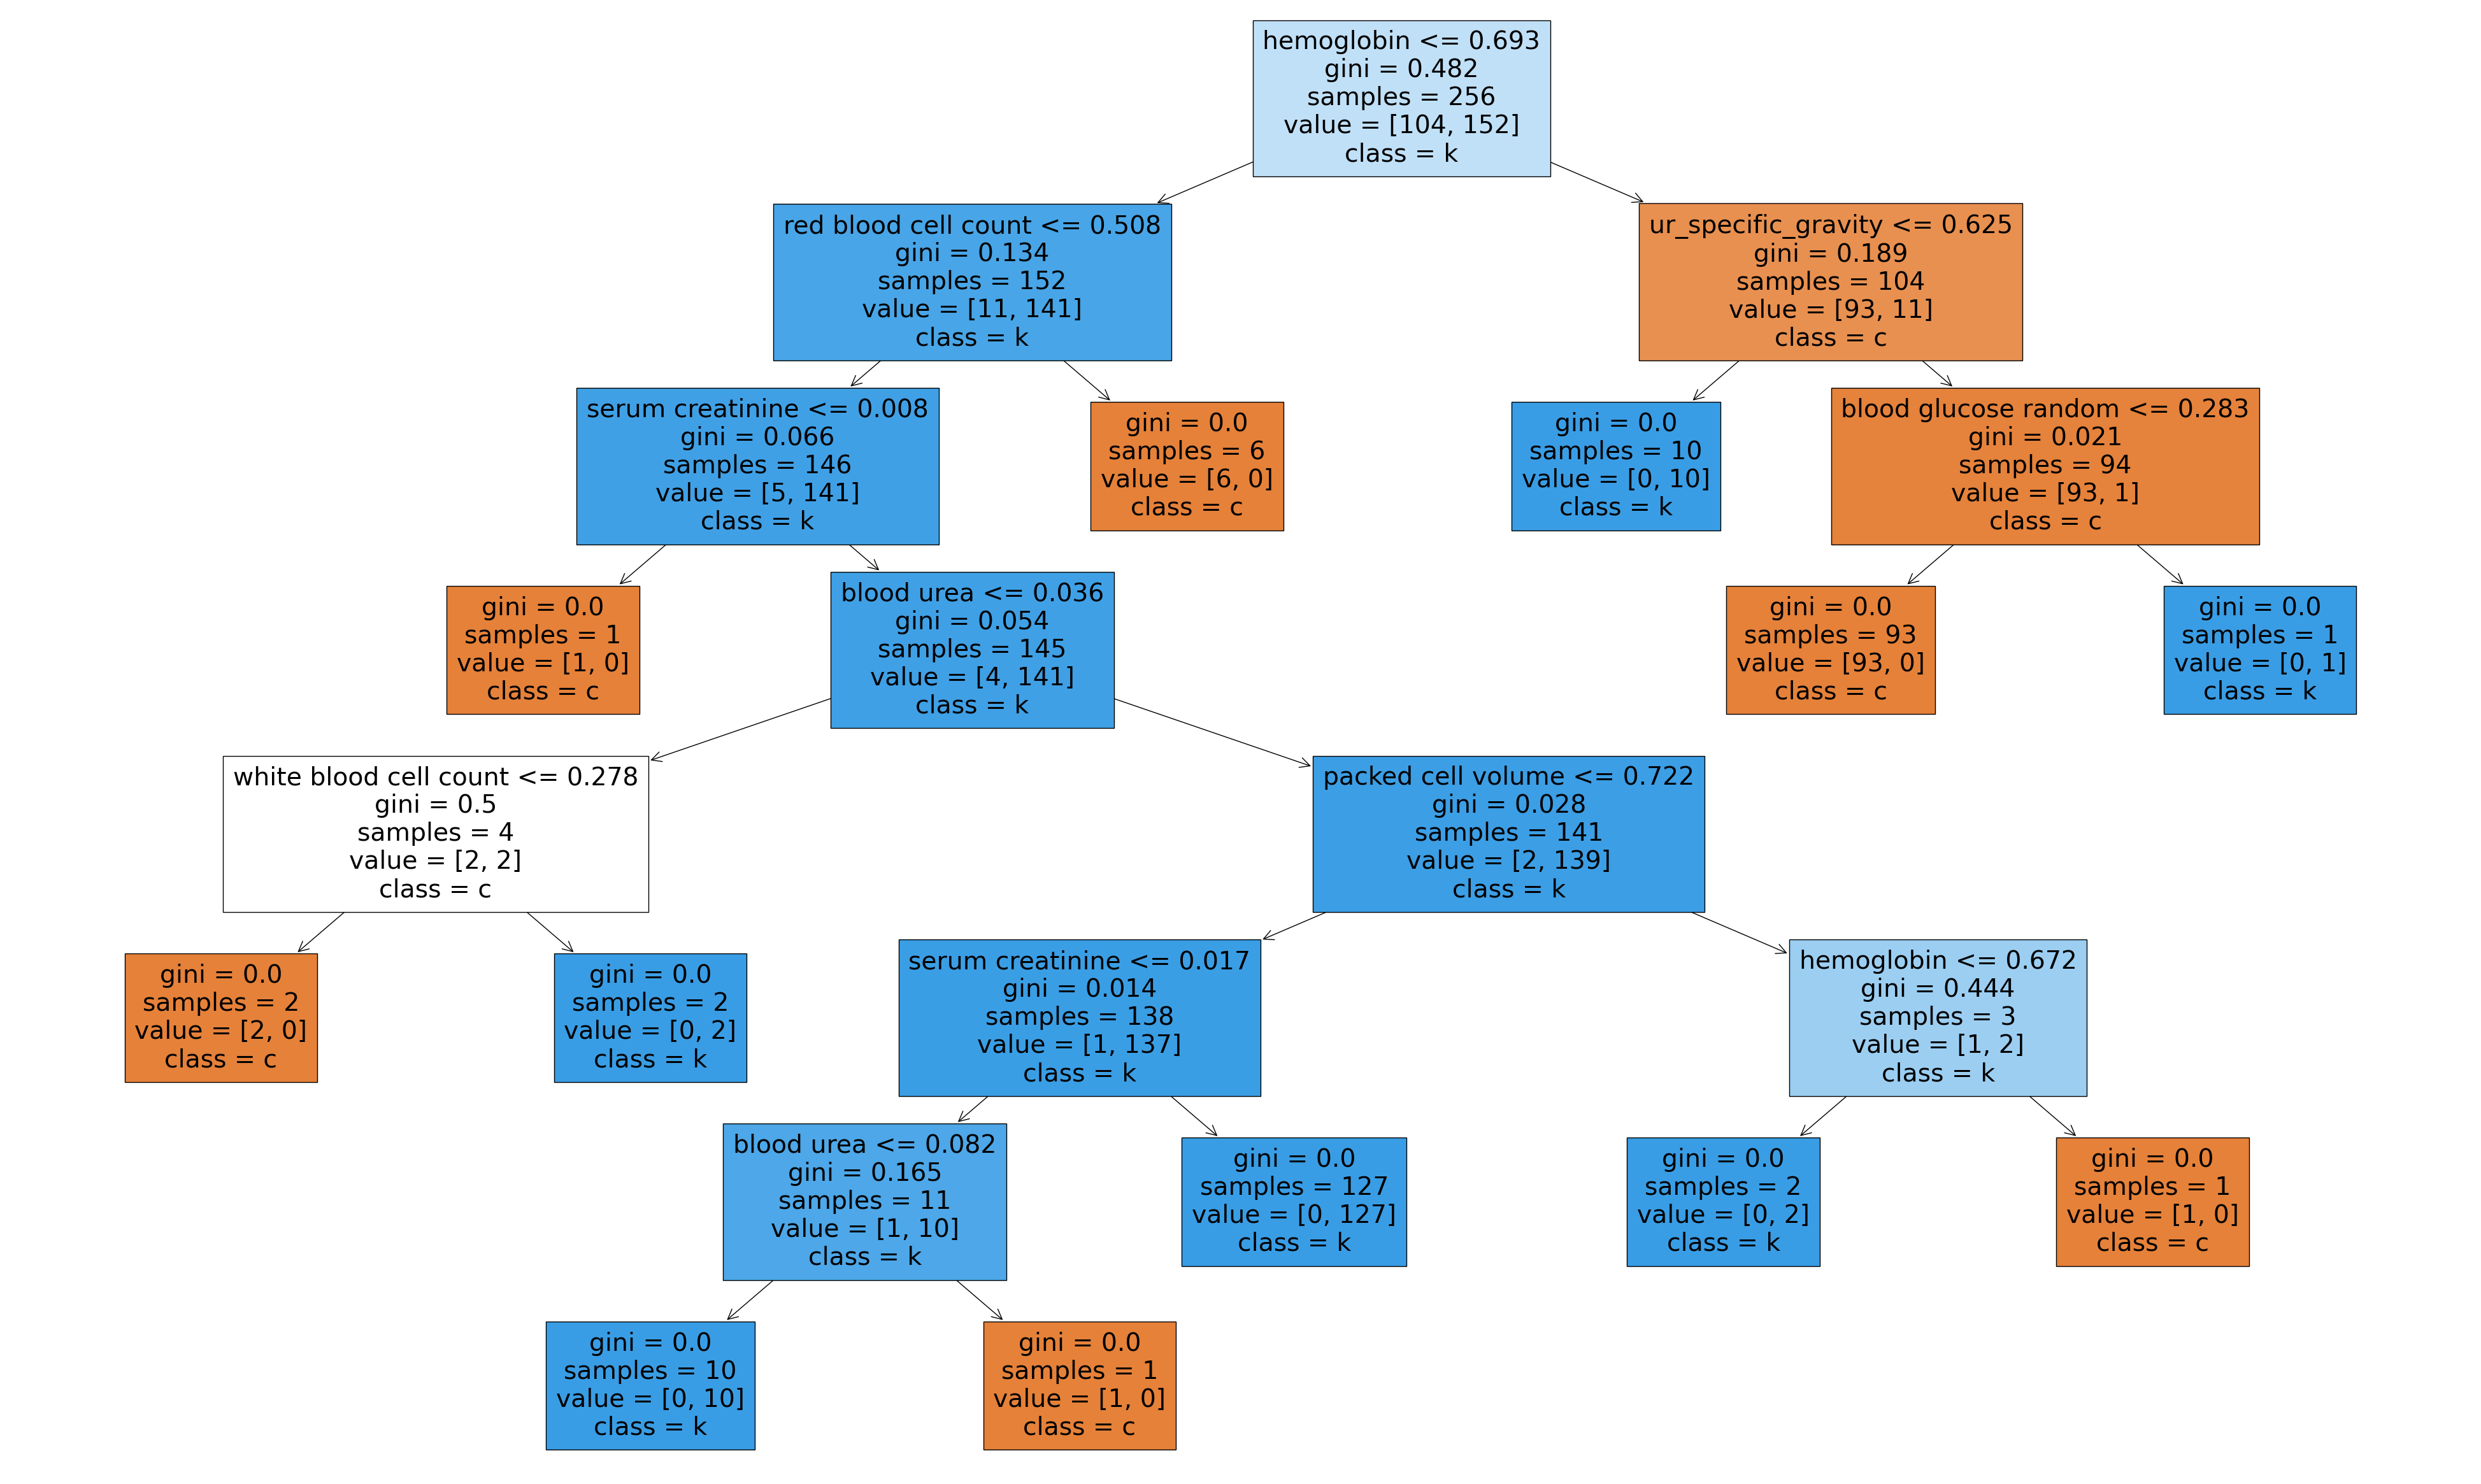

In [179]:
from matplotlib import pyplot as plt
from sklearn import tree
listc = X.columns.tolist()
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(DTC, 
                   feature_names=listc,  
                   class_names='ckd',
                   filled=True)

In [182]:
#Applying random forest, calculate the new accuracy and compare it with the previous result.
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=4) 
rfc.fit(x_train, y_train)  
y_pred=rfc.predict(x_test) 
RandomForestClf_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", RandomForestClf_accuracy_score) 

Accuracy: 0.990909090909091
